# PREDICTING VARYING INTEREST RATES

In [2]:
# Import Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm

In [3]:
#Loading the dataset into the pandas dataframe
df = pd.read_csv("ML_ActiveCase2.csv")

In [4]:
df.head()

ID  Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  \
0  81174.0             20000                     20000.0           0.09   
1  99592.0             19200                     19200.0           0.12   
2  80059.0             35000                     35000.0           0.22   
3  15825.0             10000                      9975.0           0.10   
4  33182.0             12000                     12000.0           0.12   

  Loan.Length        Loan.Purpose  Debt.To.Income.Ratio Home.Ownership  \
0   36 months  debt_consolidation                  0.15       MORTGAGE   
1   36 months  debt_consolidation                  0.28       MORTGAGE   
2   60 months  debt_consolidation                  0.24       MORTGAGE   
3   36 months  debt_consolidation                  0.14       MORTGAGE   
4   36 months         credit_card                  0.19           RENT   

   Monthly.Income  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67                 14                     14272   
1         4583.33                 12                     11140   
2        11500.00                 14                     21977   
3         3833.33                 10                      9346   
4         3195.00                 11                     14469   

   Inquiries.in.the.Last.6.Months Employment.Length  
0                               2            1 year  
1                               1           2 years  
2                               1           2 years  
3                               0           5 years  
4                               0           9 years

In [4]:
df.tail()

ID  Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  \
2495  23735.0             30000                    29950.00           0.17   
2496  65882.0             16000                    16000.00           0.14   
2497  55610.0             10000                    10000.00           0.14   
2498  38576.0              6000                     6000.00           0.12   
2499   3116.0              9000                     5242.75           0.14   

     Loan.Length        Loan.Purpose  Debt.To.Income.Ratio Home.Ownership  \
2495   60 months  debt_consolidation                  0.19       MORTGAGE   
2496   60 months    home_improvement                  0.22            OWN   
2497   36 months  debt_consolidation                  0.05       MORTGAGE   
2498   36 months      major_purchase                  0.17           RENT   
2499   36 months  debt_consolidation                  0.07           RENT   

      Monthly.Income  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
2495         9250.00                 15                     45880   
2496         8903.25                 18                     18898   
2497         2166.67                  4                      4544   
2498         3500.00                  8                      1275   
2499         3875.00                  7                      7589   

      Inquiries.in.the.Last.6.Months Employment.Length  
2495                               1           8 years  
2496                               1         10+ years  
2497                               0         10+ years  
2498                               0           5 years  
2499                               0         10+ years

In [5]:
df.describe()

ID  Amount.Requested  Amount.Funded.By.Investors  \
count    2499.000000       2500.000000                 2500.000000   
mean    51643.325330      12389.590000                11984.346044   
std     30053.637661       7814.420929                 7743.480223   
min        10.000000       1000.000000                  200.000000   
25%     26570.500000       6000.000000                 6000.000000   
50%     50673.000000      10000.000000                10000.000000   
75%     77583.000000      17000.000000                16000.000000   
max    104202.000000      35000.000000                35000.000000   

       Interest.Rate  Debt.To.Income.Ratio  Monthly.Income  Open.CREDIT.Lines  \
count    2500.000000           2500.000000     2500.000000        2500.000000   
mean        0.130396              0.153752     5685.153348          10.060800   
std         0.041301              0.075164     3963.376189           4.516687   
min         0.050000              0.000000      588.500000           2.000000   
25%         0.100000              0.100000     3474.267500           7.000000   
50%         0.130000              0.150000     5000.000000           9.000000   
75%         0.160000              0.210000     6800.000000          13.000000   
max         0.250000              0.350000   102750.000000          38.000000   

       Revolving.CREDIT.Balance  Inquiries.in.the.Last.6.Months  
count               2500.000000                     2500.000000  
mean               15225.668800                        0.910400  
std                18308.723678                        1.235064  
min                    0.000000                        0.000000  
25%                 5545.250000                        0.000000  
50%                10938.000000                        1.000000  
75%                18870.250000                        1.000000  
max               270800.000000                        9.000000

In [6]:
df.shape

(2500, 13)

In [5]:
df.isnull().sum()

ID                                 1
Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               0
Home.Ownership                     1
Monthly.Income                     0
Open.CREDIT.Lines                  0
Revolving.CREDIT.Balance           0
Inquiries.in.the.Last.6.Months     0
Employment.Length                 78
dtype: int64

In [6]:
print(78*100/2500) #less than 5% NA or Missing Values .. Safe to Drop Them(Values)
print(1*100/2500)

3.12
0.04


In [7]:
dupli = df[df.duplicated()]
dupli

Empty DataFrame
Columns: [ID, Amount.Requested, Amount.Funded.By.Investors, Interest.Rate, Loan.Length, Loan.Purpose, Debt.To.Income.Ratio, Home.Ownership, Monthly.Income, Open.CREDIT.Lines, Revolving.CREDIT.Balance, Inquiries.in.the.Last.6.Months, Employment.Length]
Index: []

In [8]:
# There is no duplicated values
# only 3.12% and 0.04 of data has missing values lets drop those missing values asless than 5% NA or Missing Values
# Assumption1 : Lets drop those value

In [9]:
drop_df = df.dropna(axis = 0, how = 'any') # 'axis' 0 for rows 1 for columns , for 'any' Na Values

In [10]:
drop_df.shape

(2418, 13)

In [11]:
2418*100/2500
#right now we have 96.72% of data

96.72

In [12]:
drop_df.isnull().sum()

ID                                0
Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
Home.Ownership                    0
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

In [13]:
drop_df.describe()

ID  Amount.Requested  Amount.Funded.By.Investors  \
count    2418.000000       2418.000000                 2418.000000   
mean    51325.622002      12471.681141                12053.127233   
std     30110.565130       7795.296020                 7725.974033   
min        10.000000       1000.000000                  200.000000   
25%     26122.250000       6000.000000                 6000.000000   
50%     49956.500000      10000.000000                10000.000000   
75%     77248.250000      17000.000000                16156.250000   
max    104202.000000      35000.000000                35000.000000   

       Interest.Rate  Debt.To.Income.Ratio  Monthly.Income  Open.CREDIT.Lines  \
count    2418.000000           2418.000000     2418.000000         2418.00000   
mean        0.130500              0.153693     5738.319293           10.09512   
std         0.041141              0.074946     3995.149694            4.51807   
min         0.050000              0.000000      588.500000            2.00000   
25%         0.100000              0.100000     3500.000000            7.00000   
50%         0.130000              0.150000     5000.000000            9.00000   
75%         0.160000              0.210000     6833.330000           13.00000   
max         0.250000              0.350000   102750.000000           38.00000   

       Revolving.CREDIT.Balance  Inquiries.in.the.Last.6.Months  
count               2418.000000                     2418.000000  
mean               15312.064516                        0.909843  
std                18357.110577                        1.239661  
min                    0.000000                        0.000000  
25%                 5596.500000                        0.000000  
50%                11013.500000                        0.000000  
75%                19009.500000                        1.000000  
max               270800.000000                        9.000000

In [14]:
eda_df=drop_df

<Axes: >

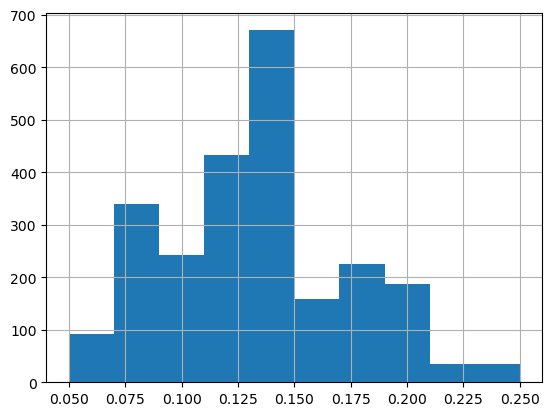

In [15]:
eda_df['Interest.Rate'].hist()

C:\Users\sagar\AppData\Local\Temp\ipykernel_3584\3029493408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eda_df['Interest.Rate'],color='purple',kde=True) ## kde is  cummulative density


<Axes: xlabel='Interest.Rate', ylabel='Density'>

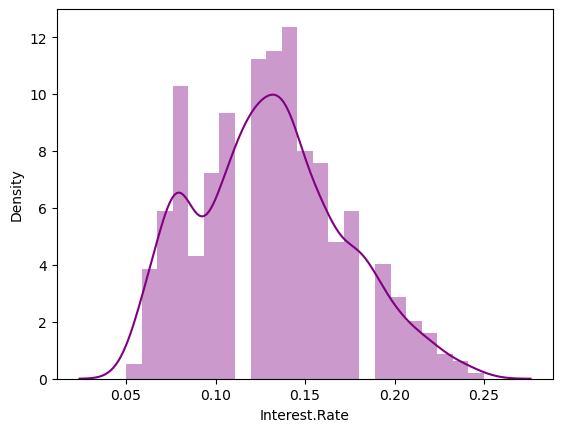

In [16]:
sns.distplot(eda_df['Interest.Rate'],color='purple',kde=True) ## kde is  cummulative density

<Axes: xlabel='Loan.Purpose', ylabel='count'>

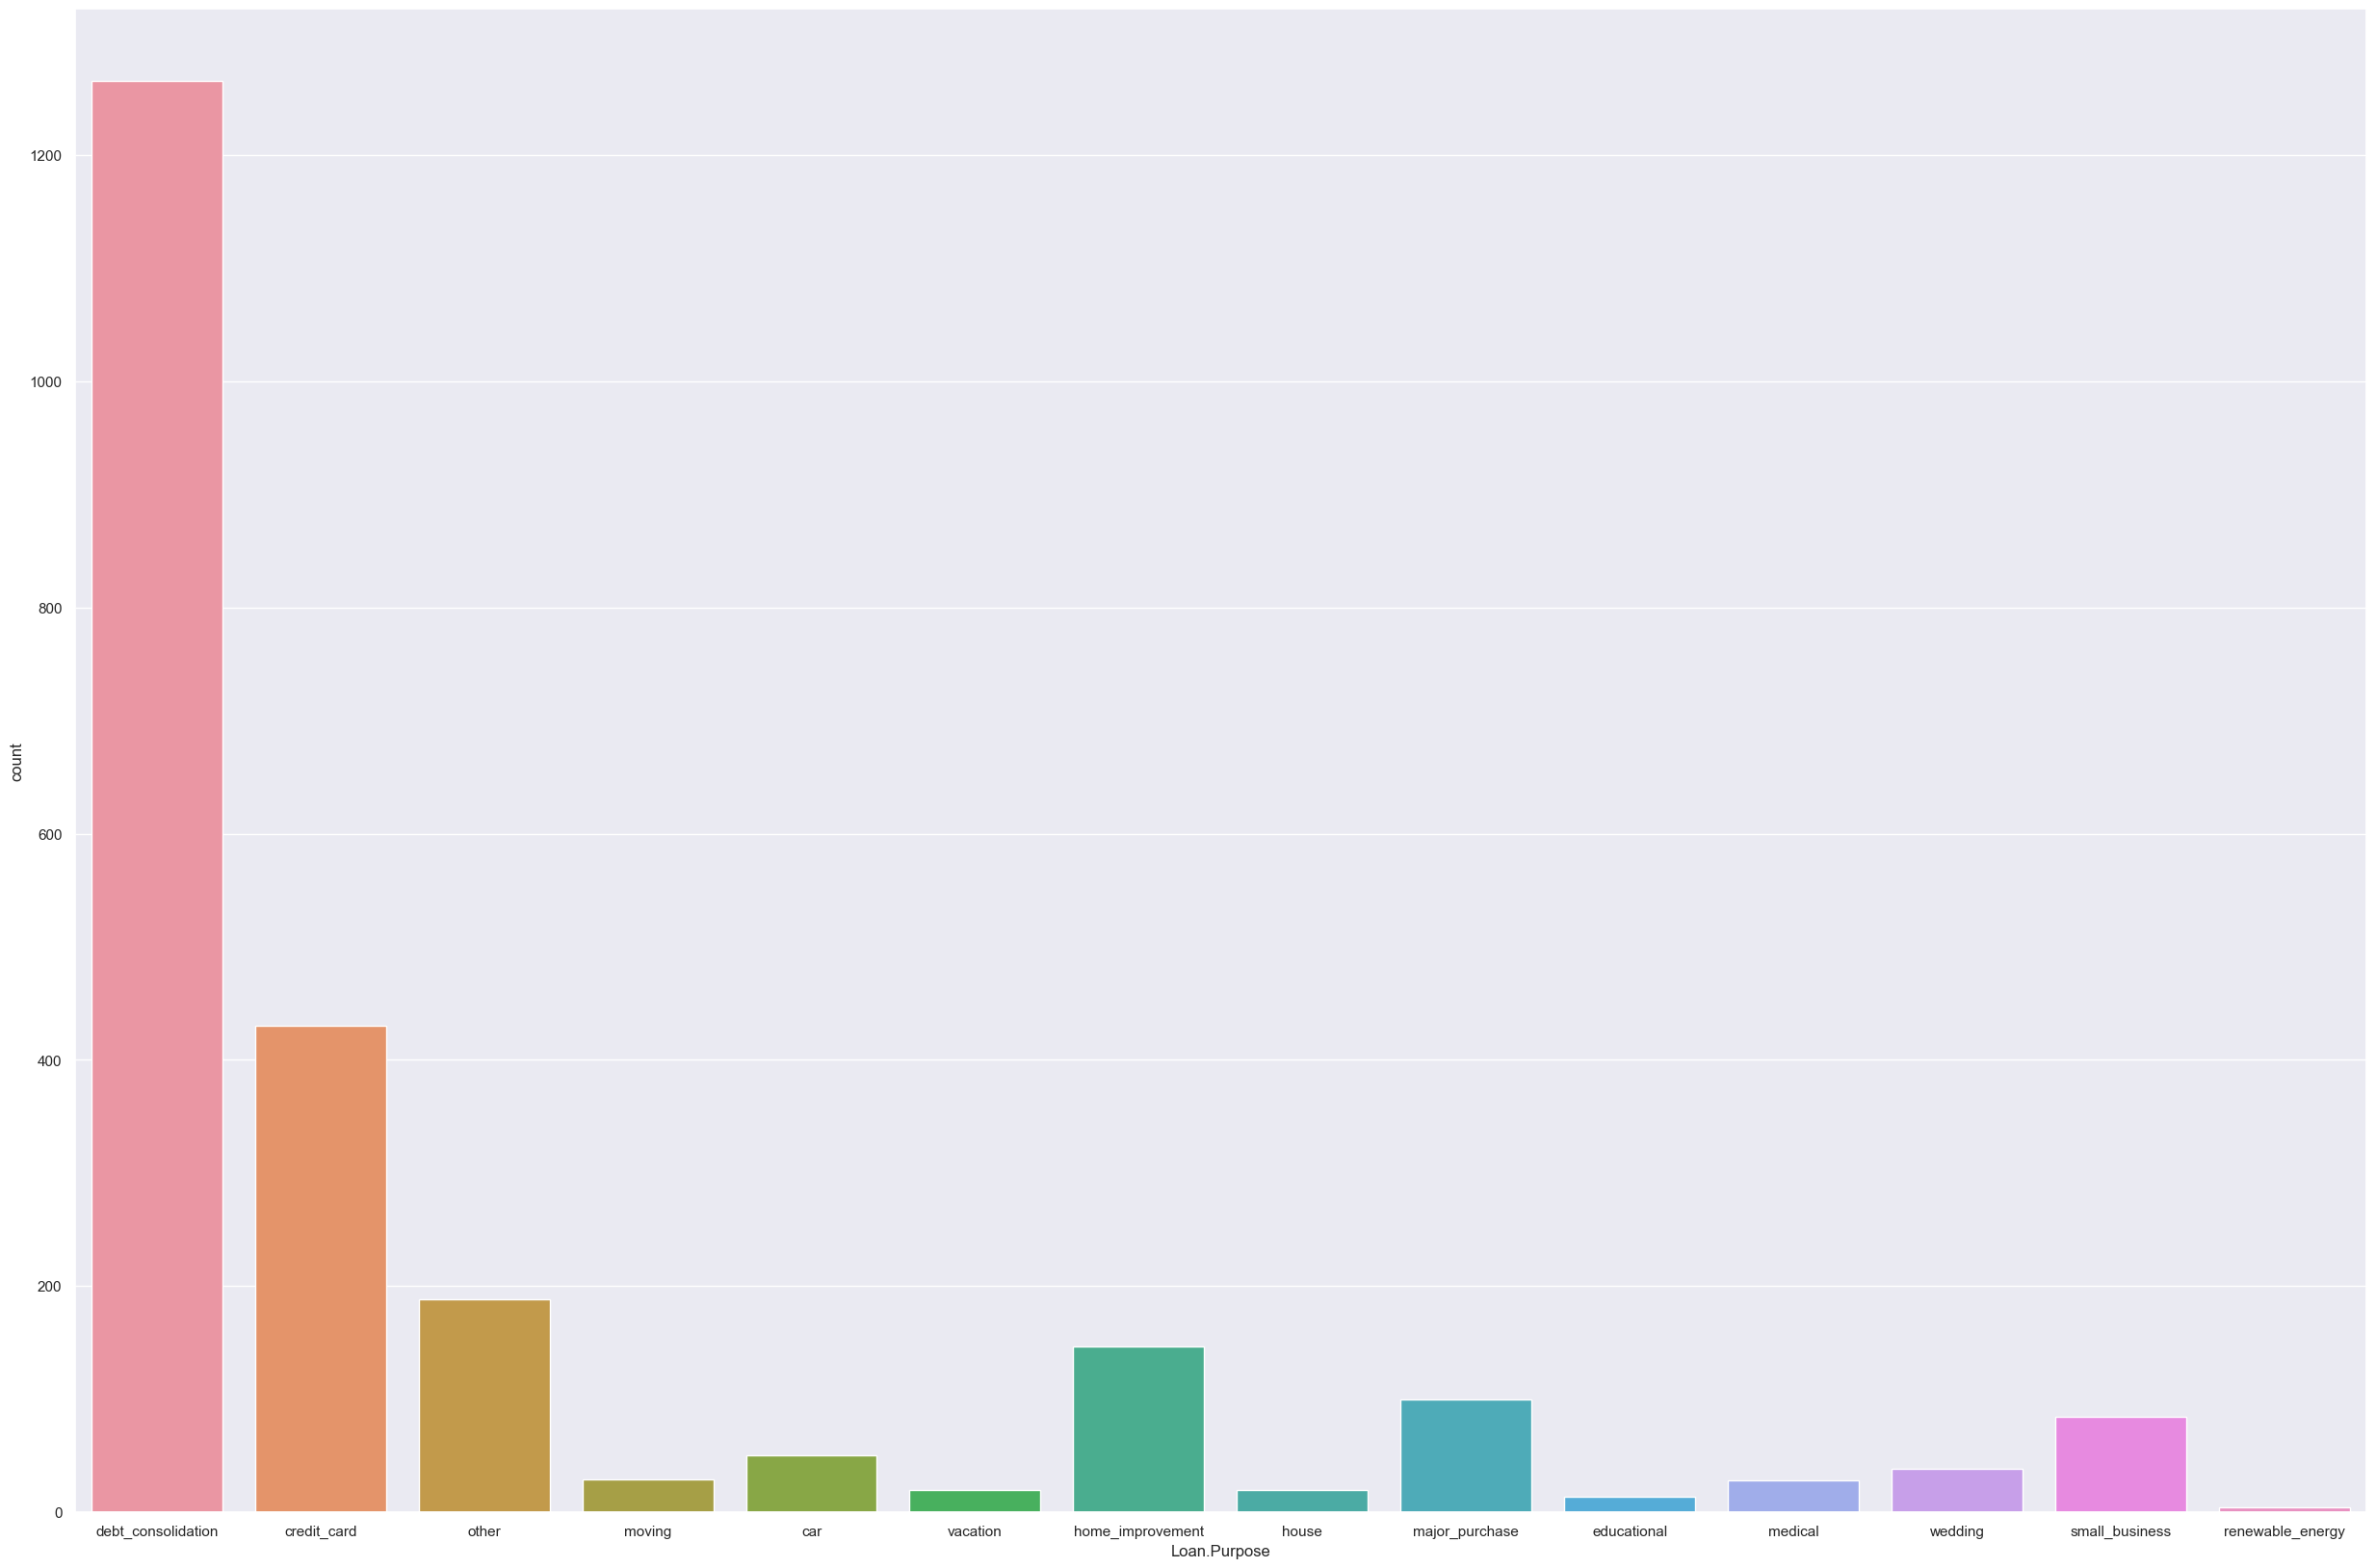

In [17]:
## SEABORN PLOT TO SHOW COUNTS OF EACH OBSERVATION IN CATEGORICAL DATA
sns.set(rc={'figure.figsize':(30.7,20.27)})
sns.countplot(x='Loan.Purpose',data=eda_df)

<Axes: xlabel='Loan.Length', ylabel='count'>

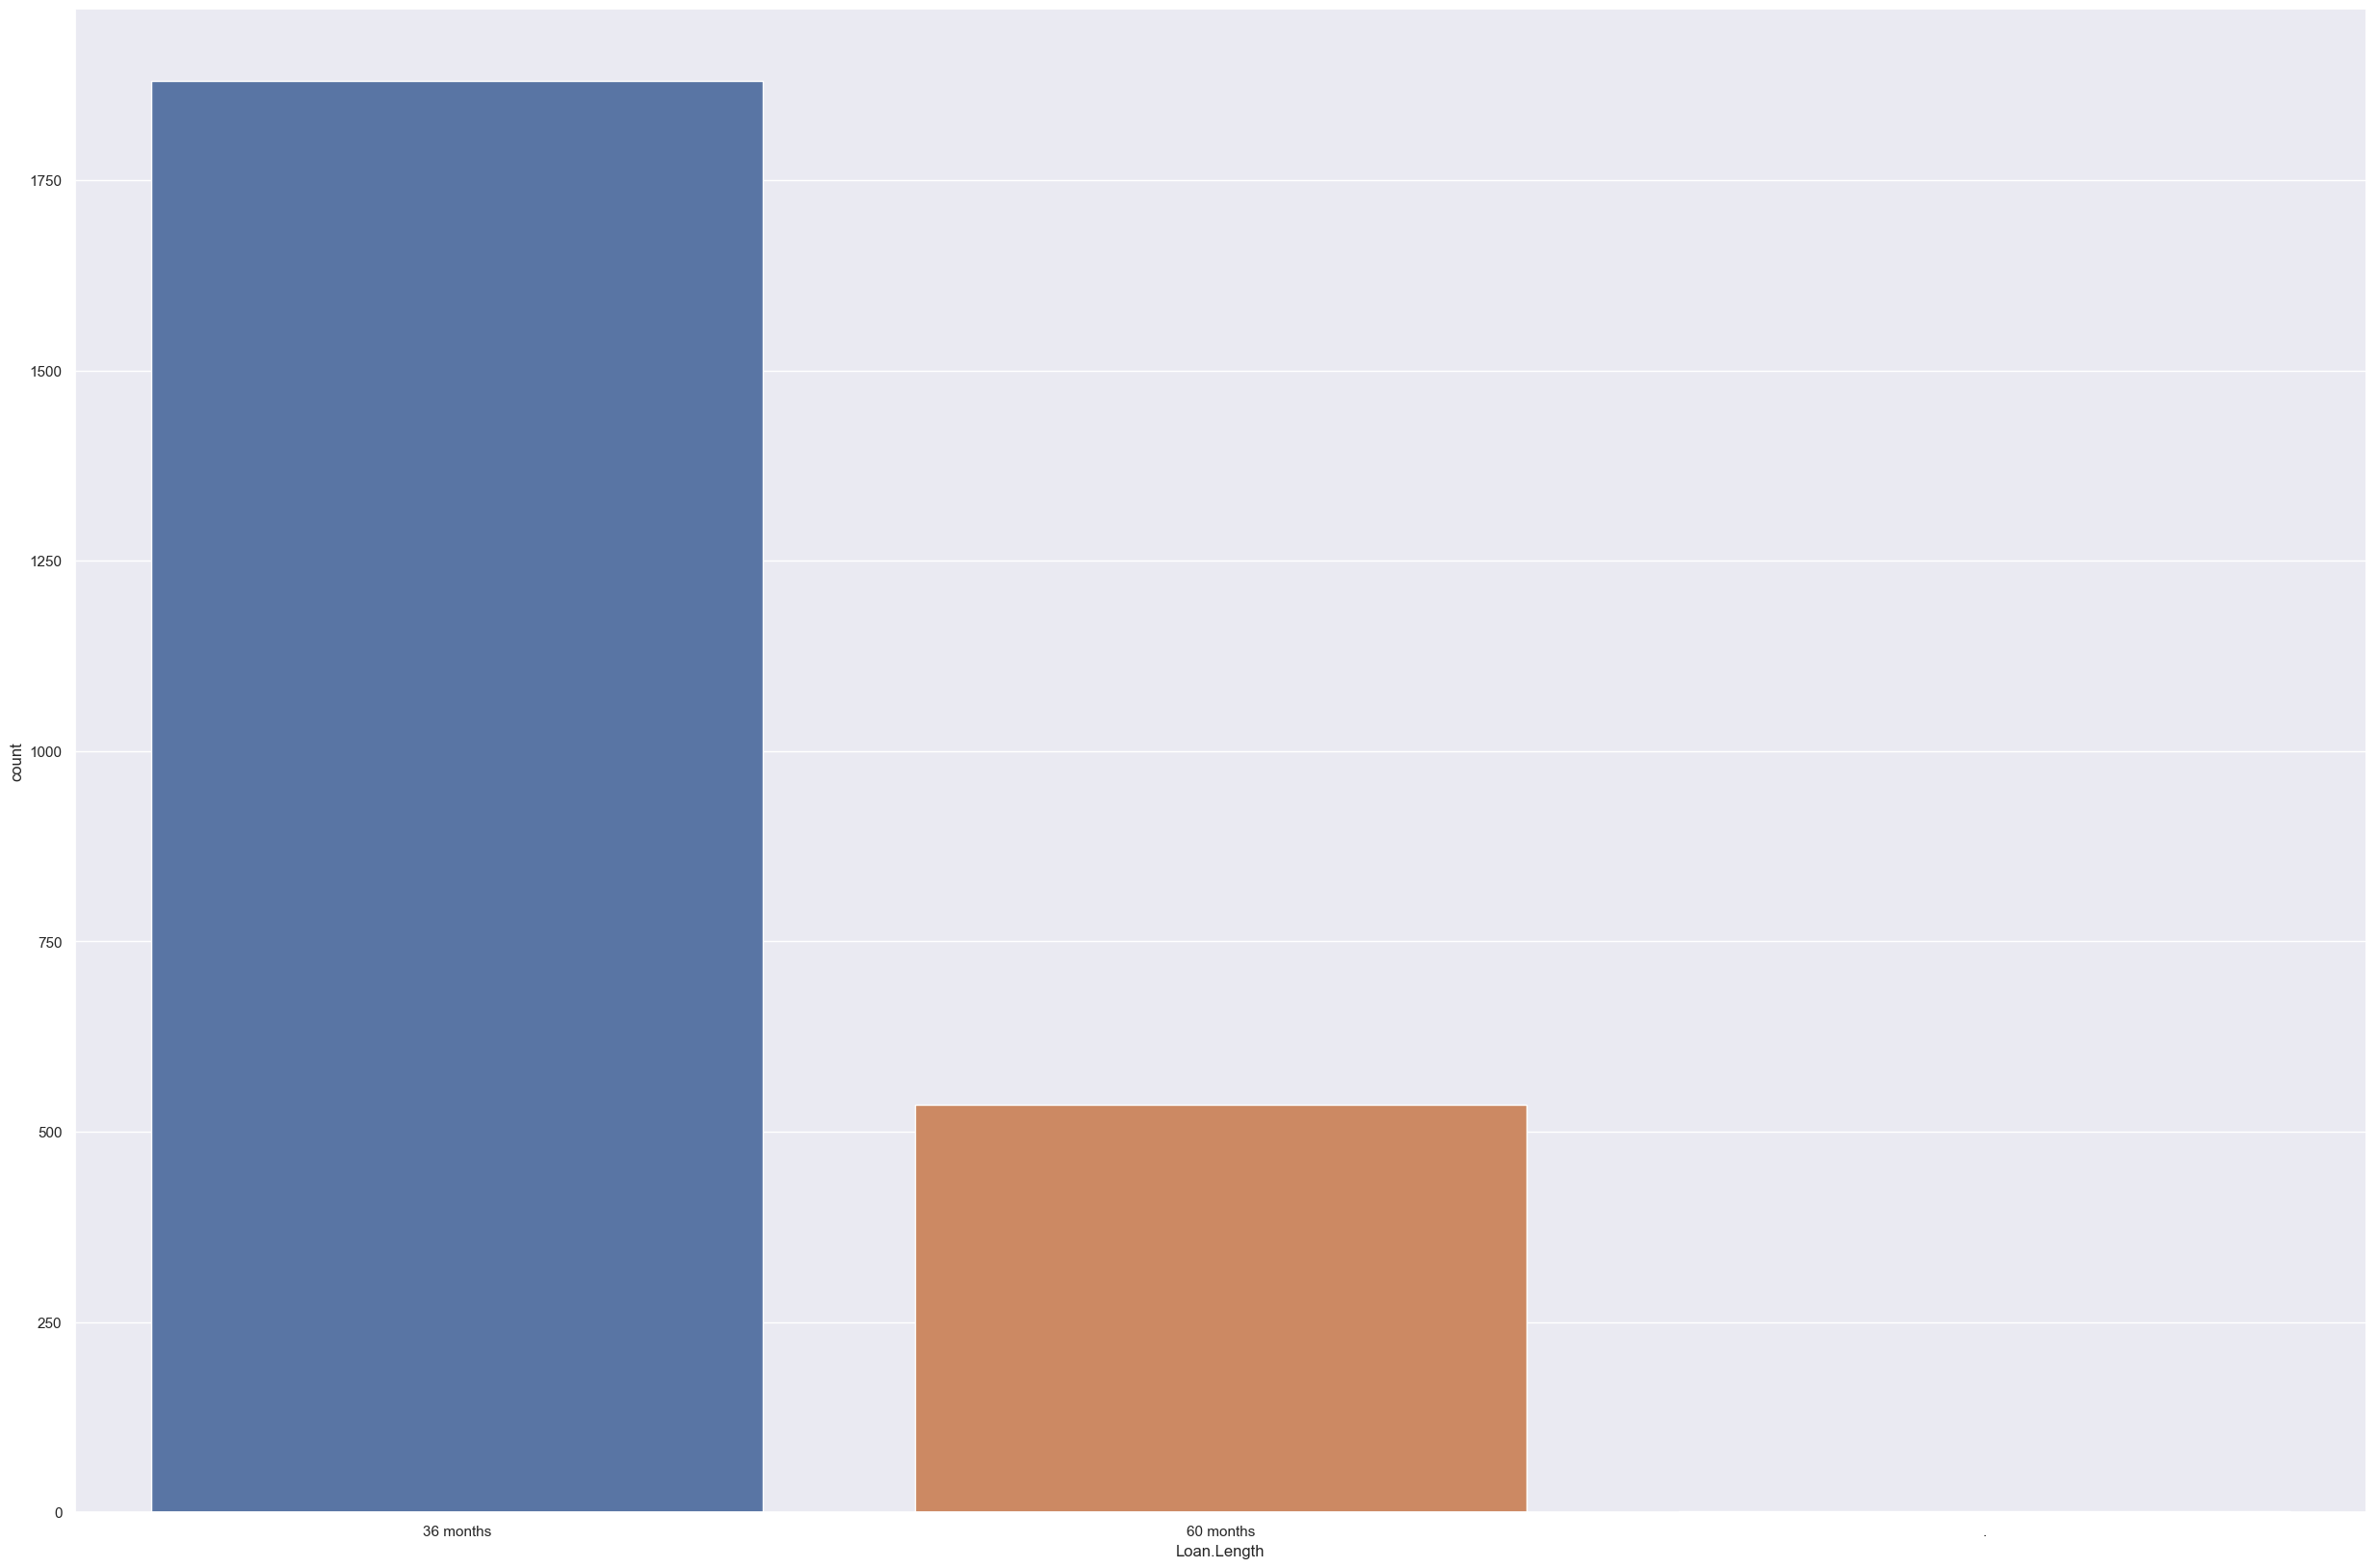

In [18]:
sns.set(rc={'figure.figsize':(30.7,20.27)})
sns.countplot(x='Loan.Length',data=eda_df)

<Axes: xlabel='Employment.Length', ylabel='count'>

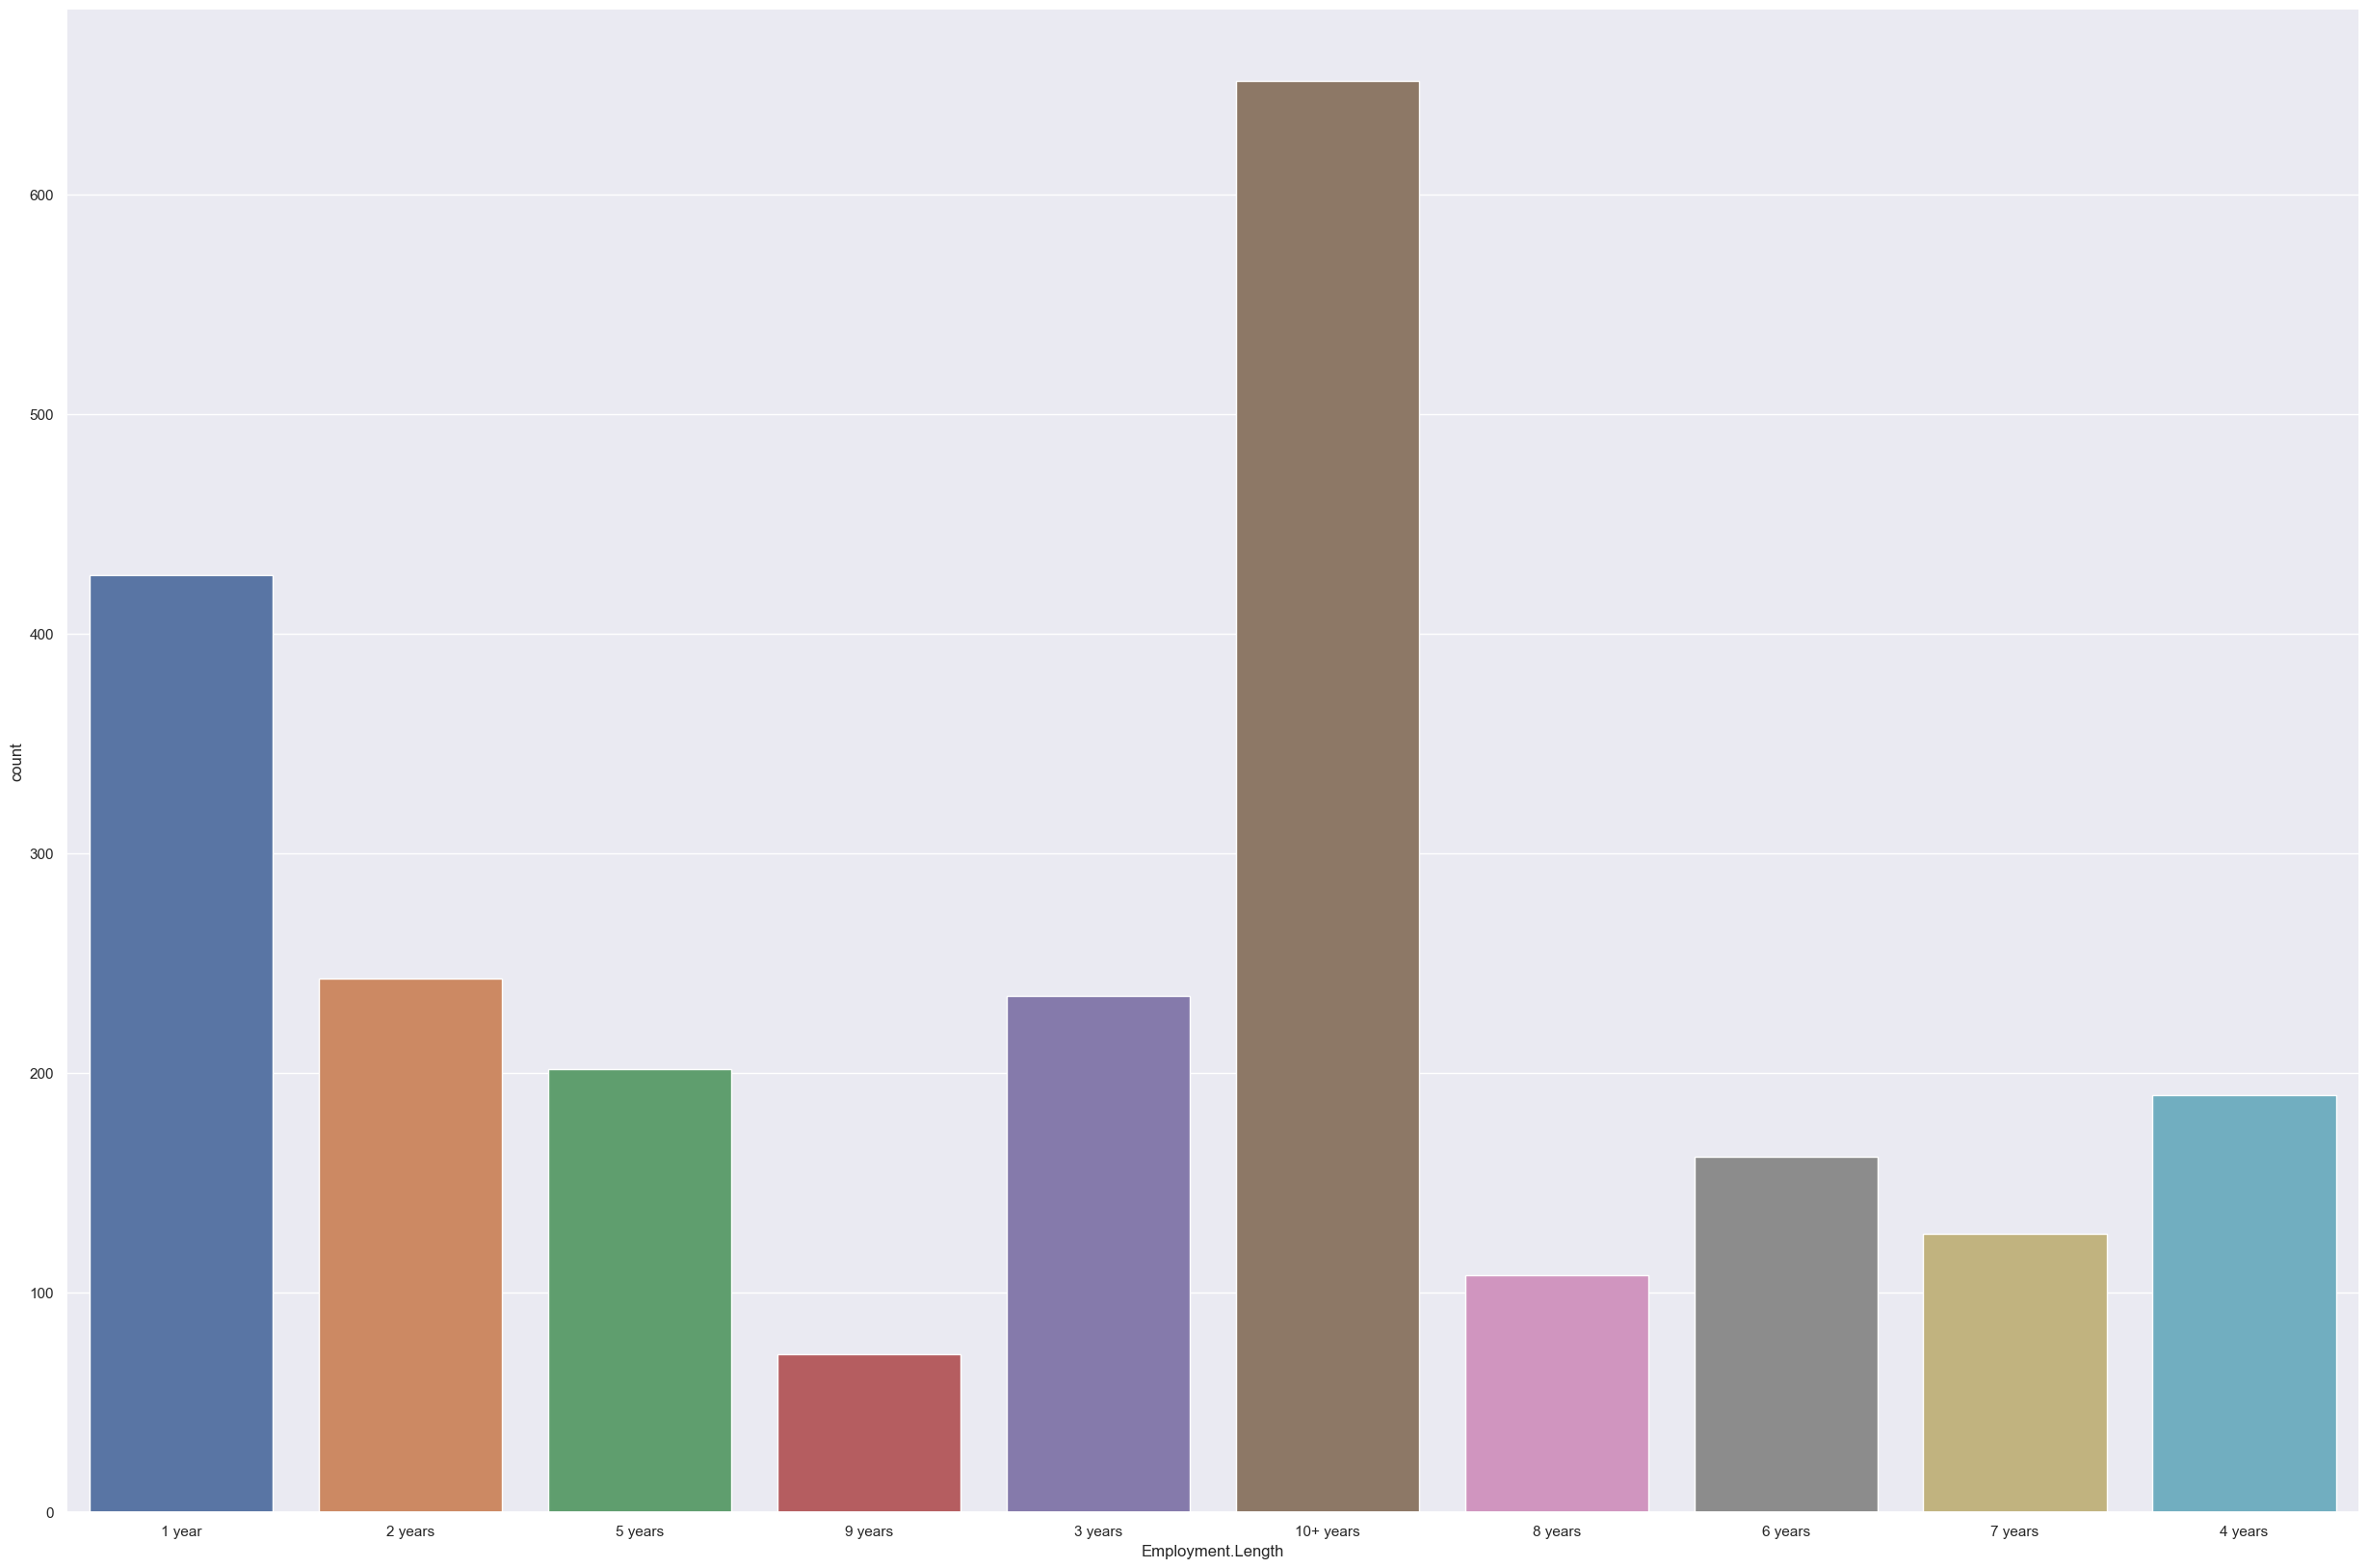

In [19]:
sns.set(rc={'figure.figsize':(30.7,20.27)})
sns.countplot(x='Employment.Length',data=eda_df)

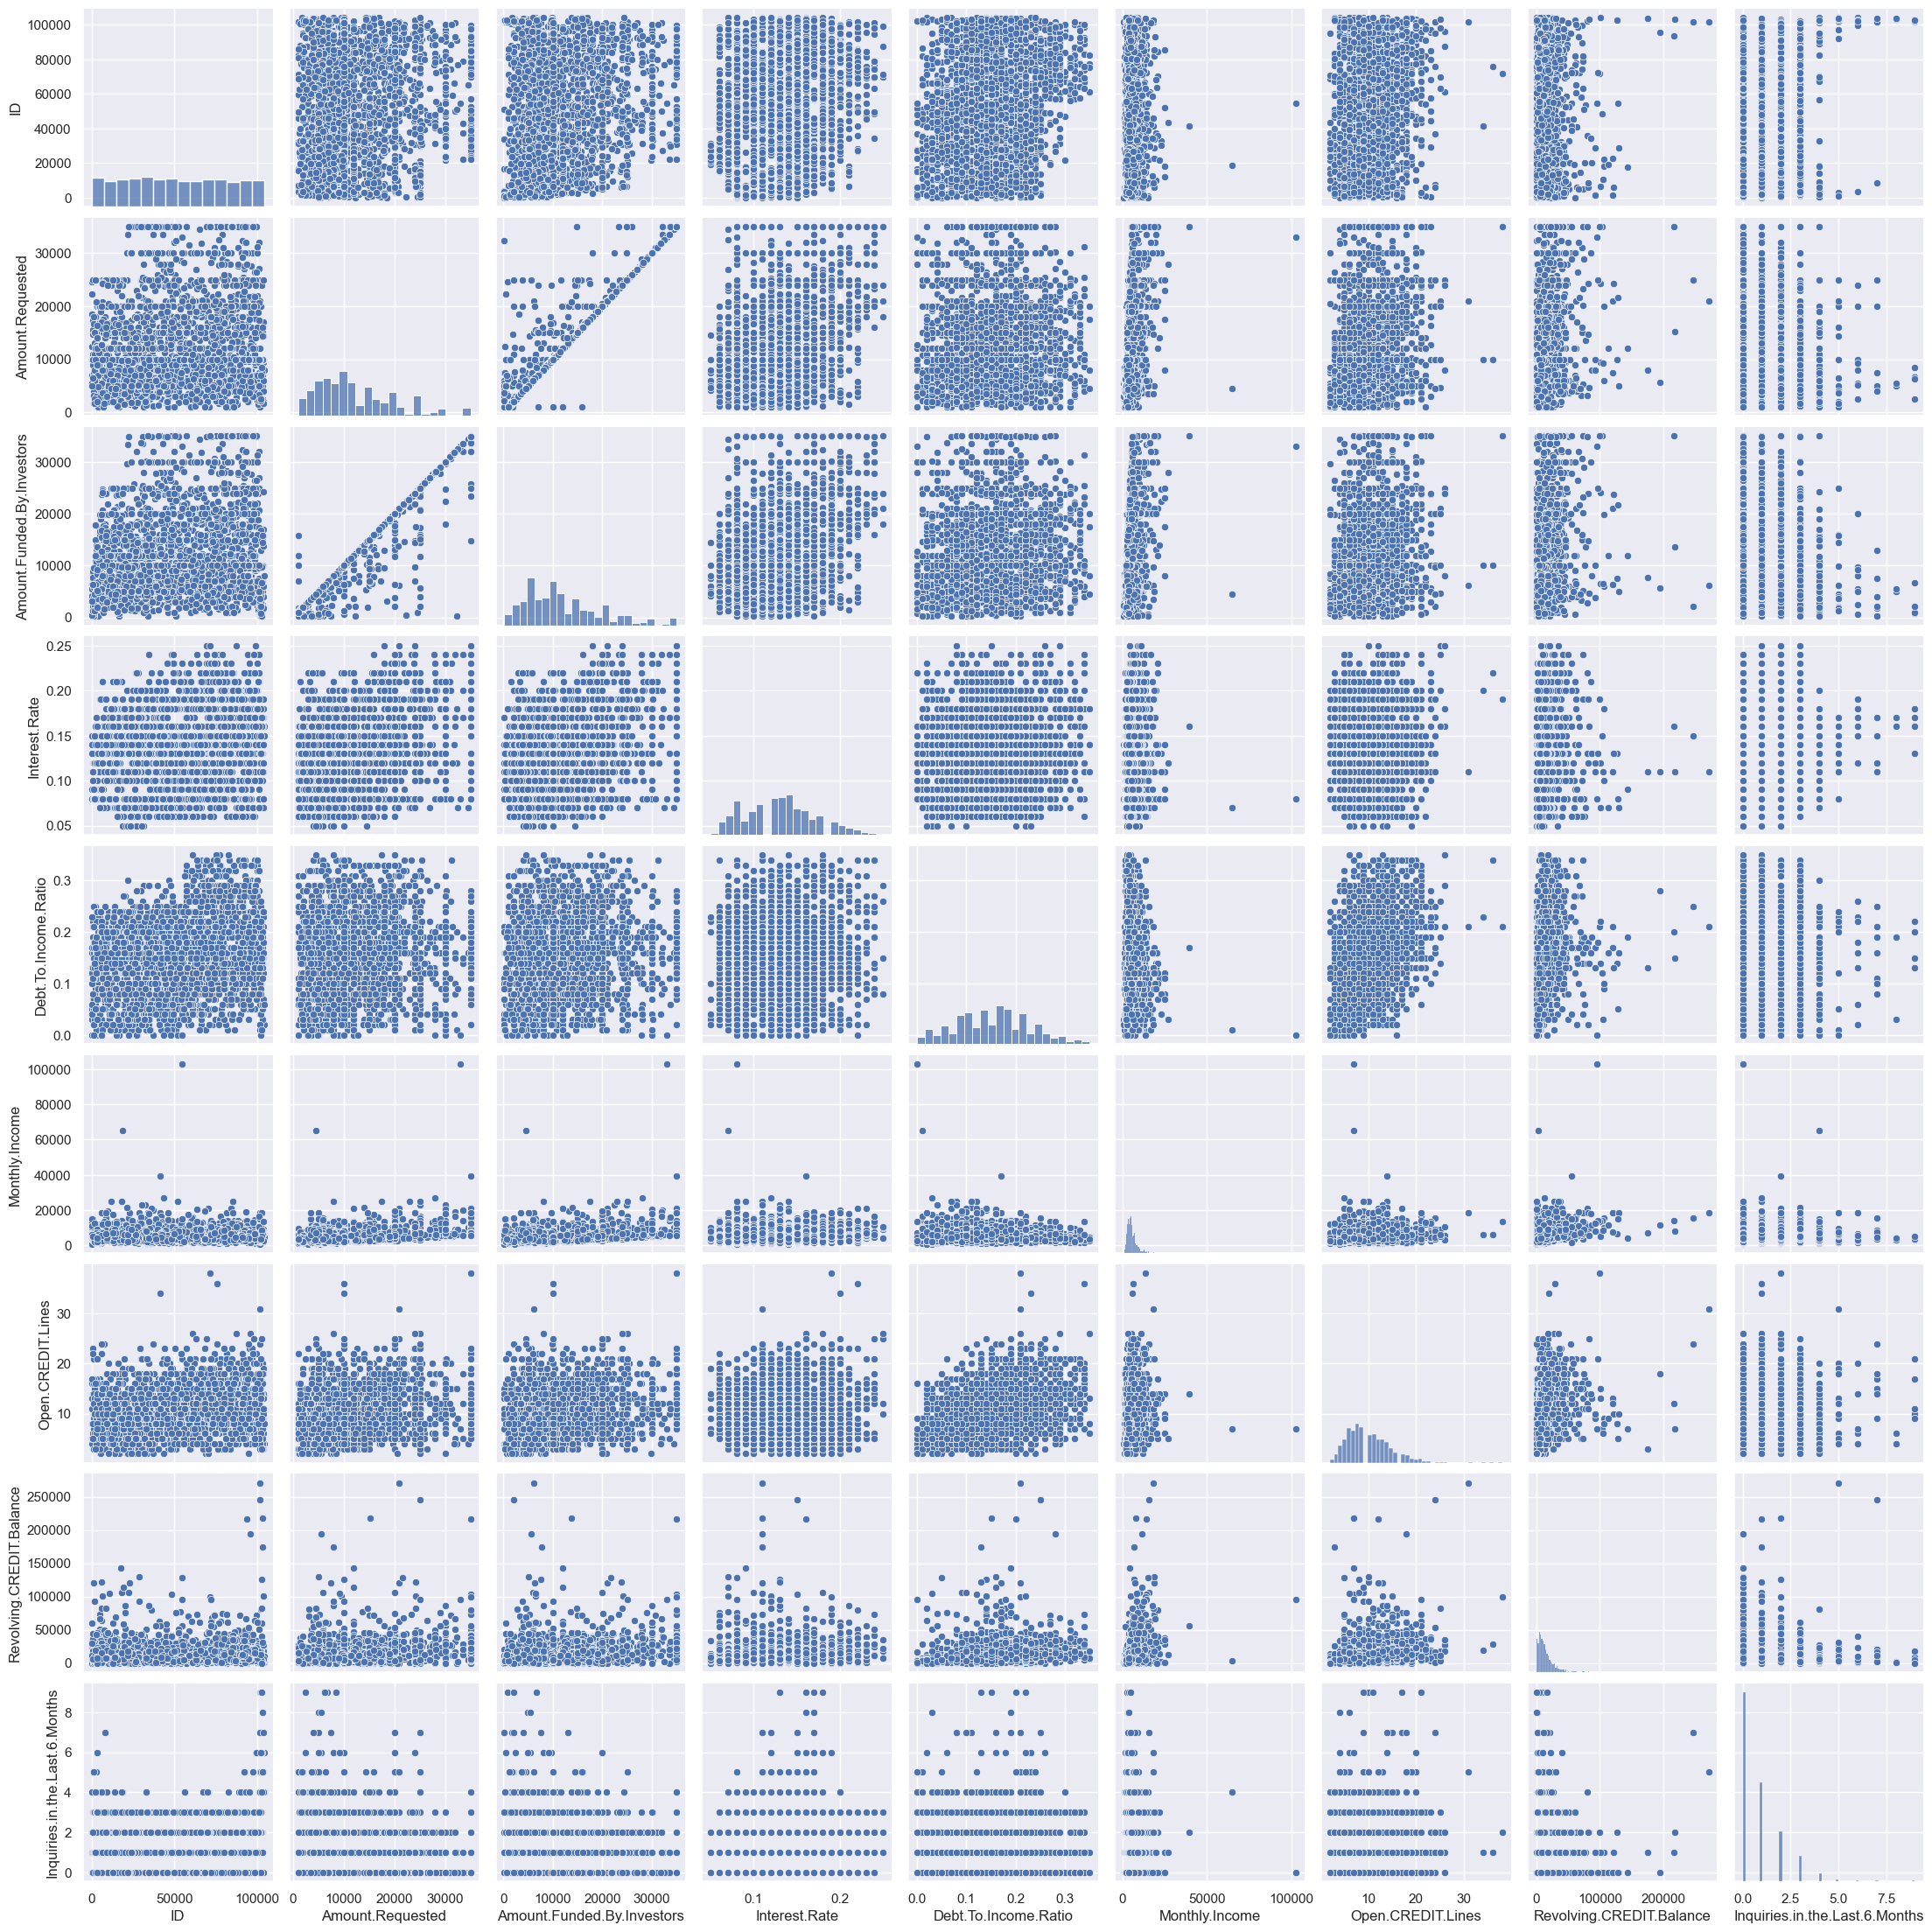

In [22]:
# PairPlot
## Inline Plot def
%matplotlib inline
sns.pairplot(drop_df)

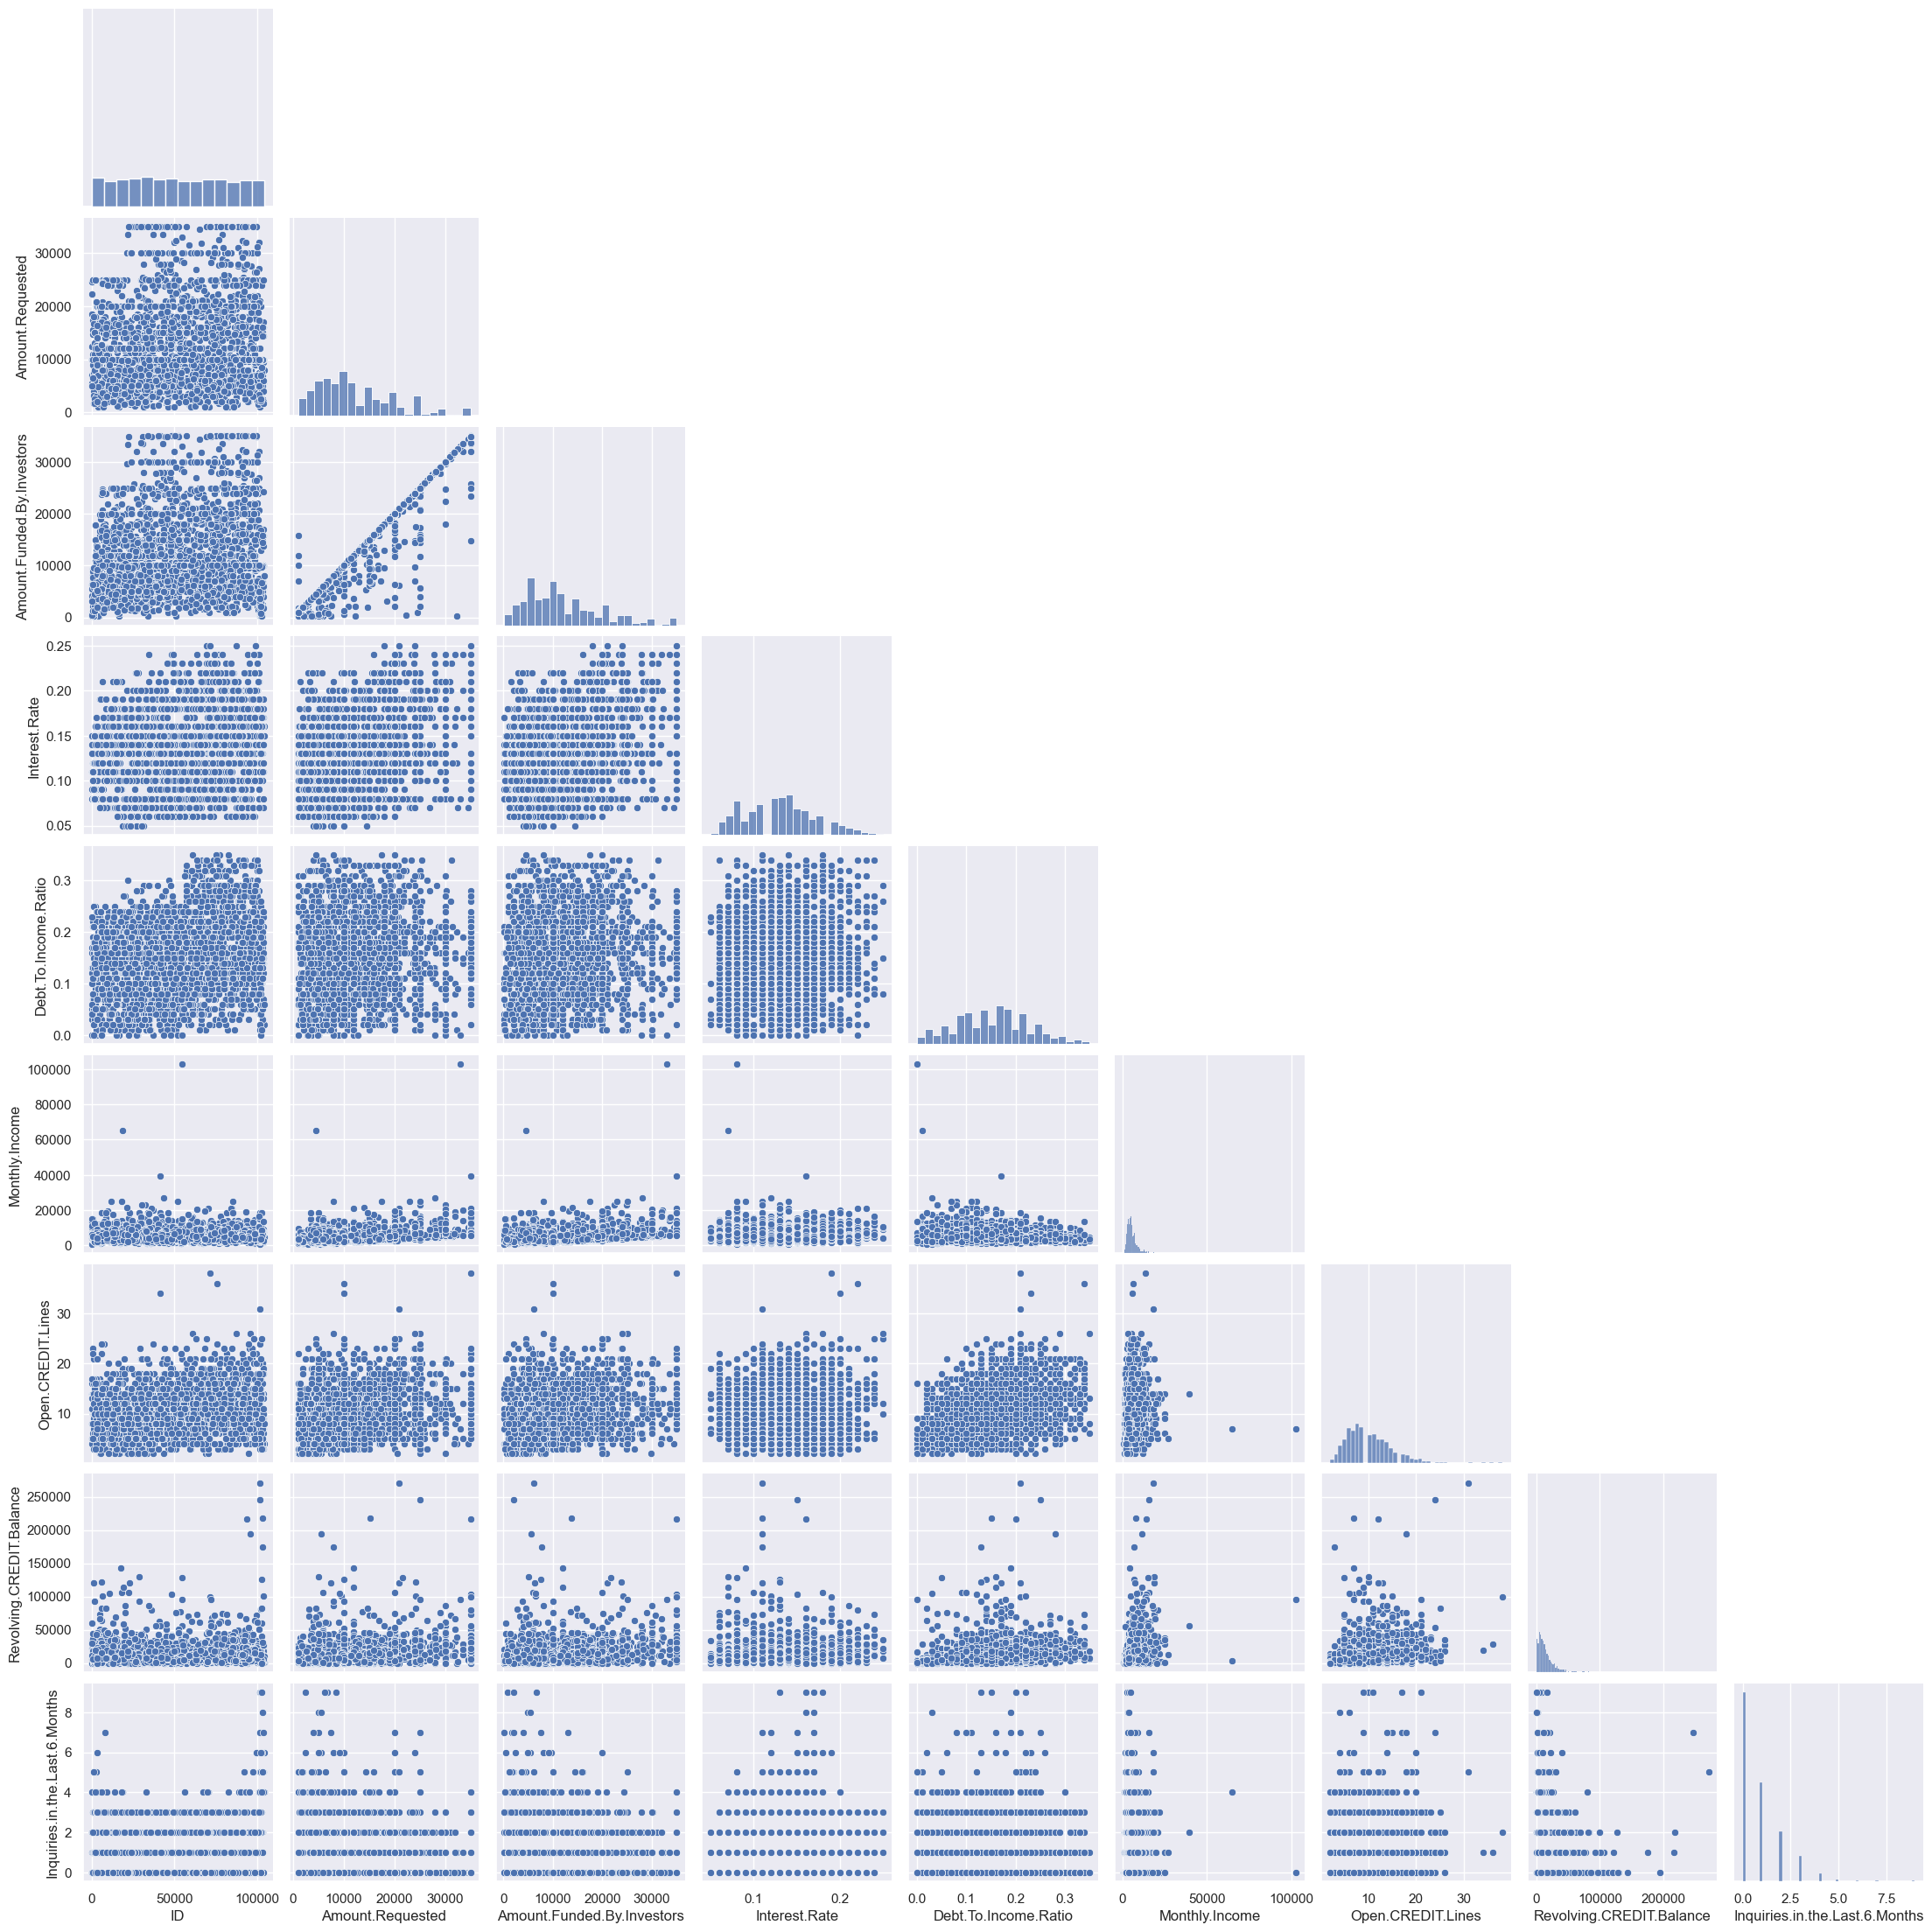

In [23]:
## Plot only the lower Triangle
sns.pairplot(drop_df, corner=True)
plt.show()  ## Supress this o/p : <seaborn.axisgrid.PairGrid at 0x1ba523e0e20>

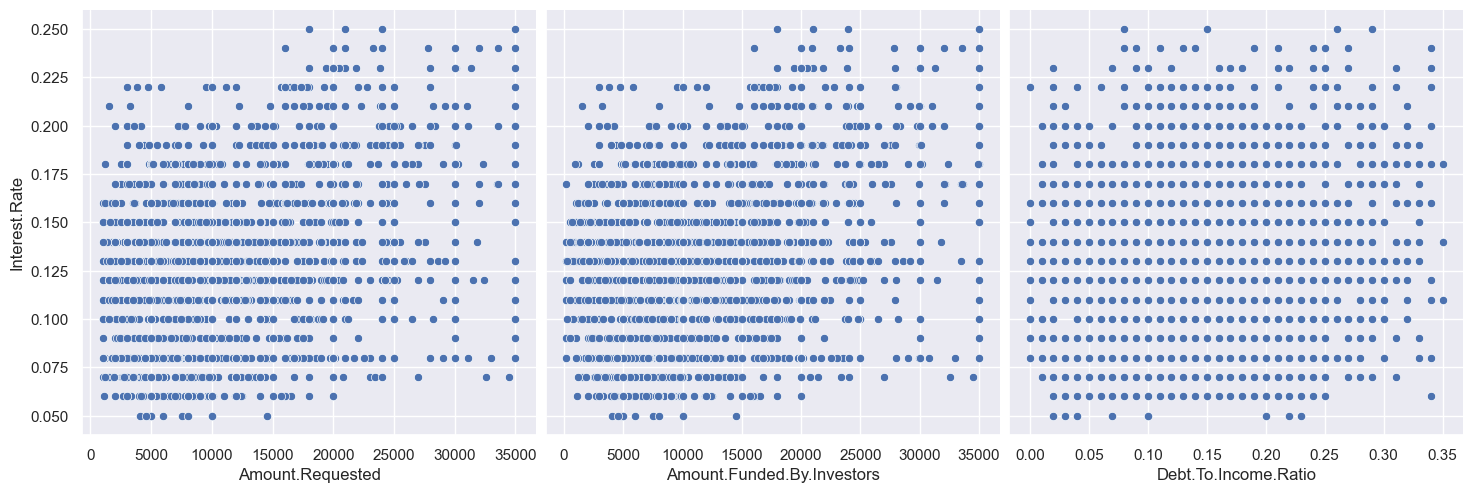

In [24]:
sns.pairplot(drop_df,x_vars =['Amount.Requested', 'Amount.Funded.By.Investors', 'Debt.To.Income.Ratio'], y_vars='Interest.Rate', height = 5,aspect = 1.0, kind= 'scatter')
plt.show()

<Axes: >

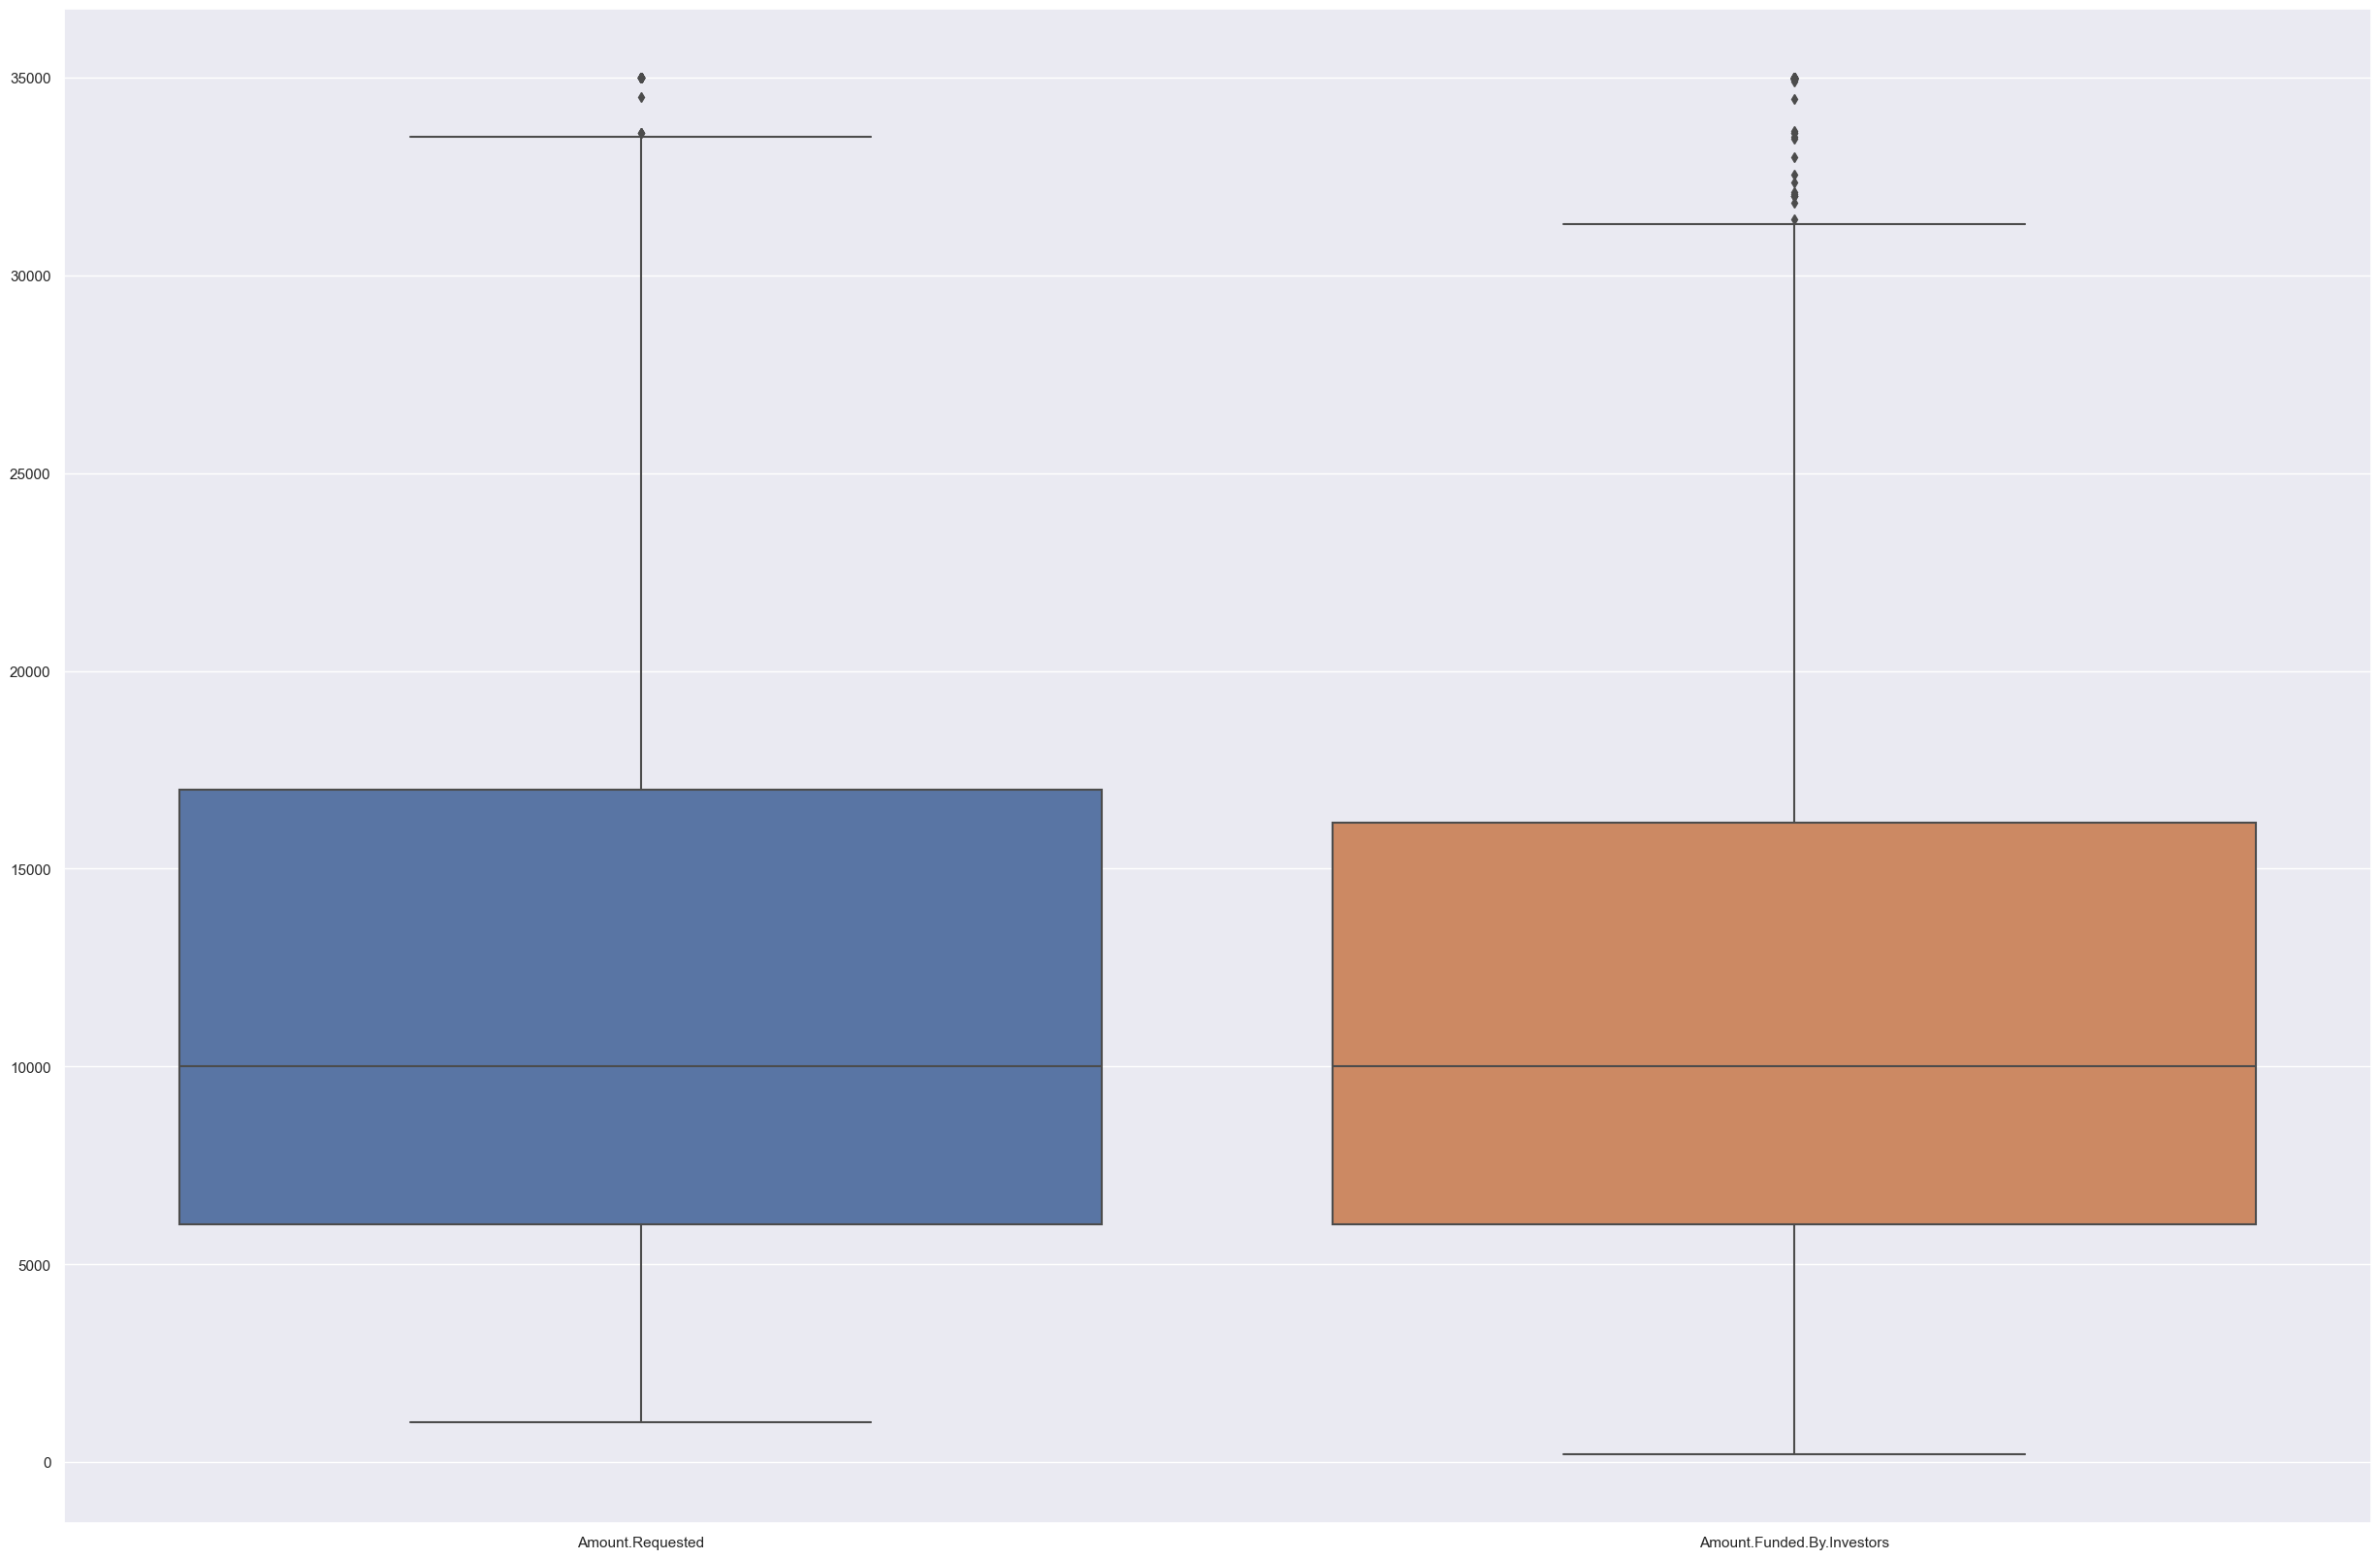

In [20]:
sns.boxplot(data=drop_df[['Amount.Requested', 'Amount.Funded.By.Investors']], orient = "v") # v = vertical

<Axes: >

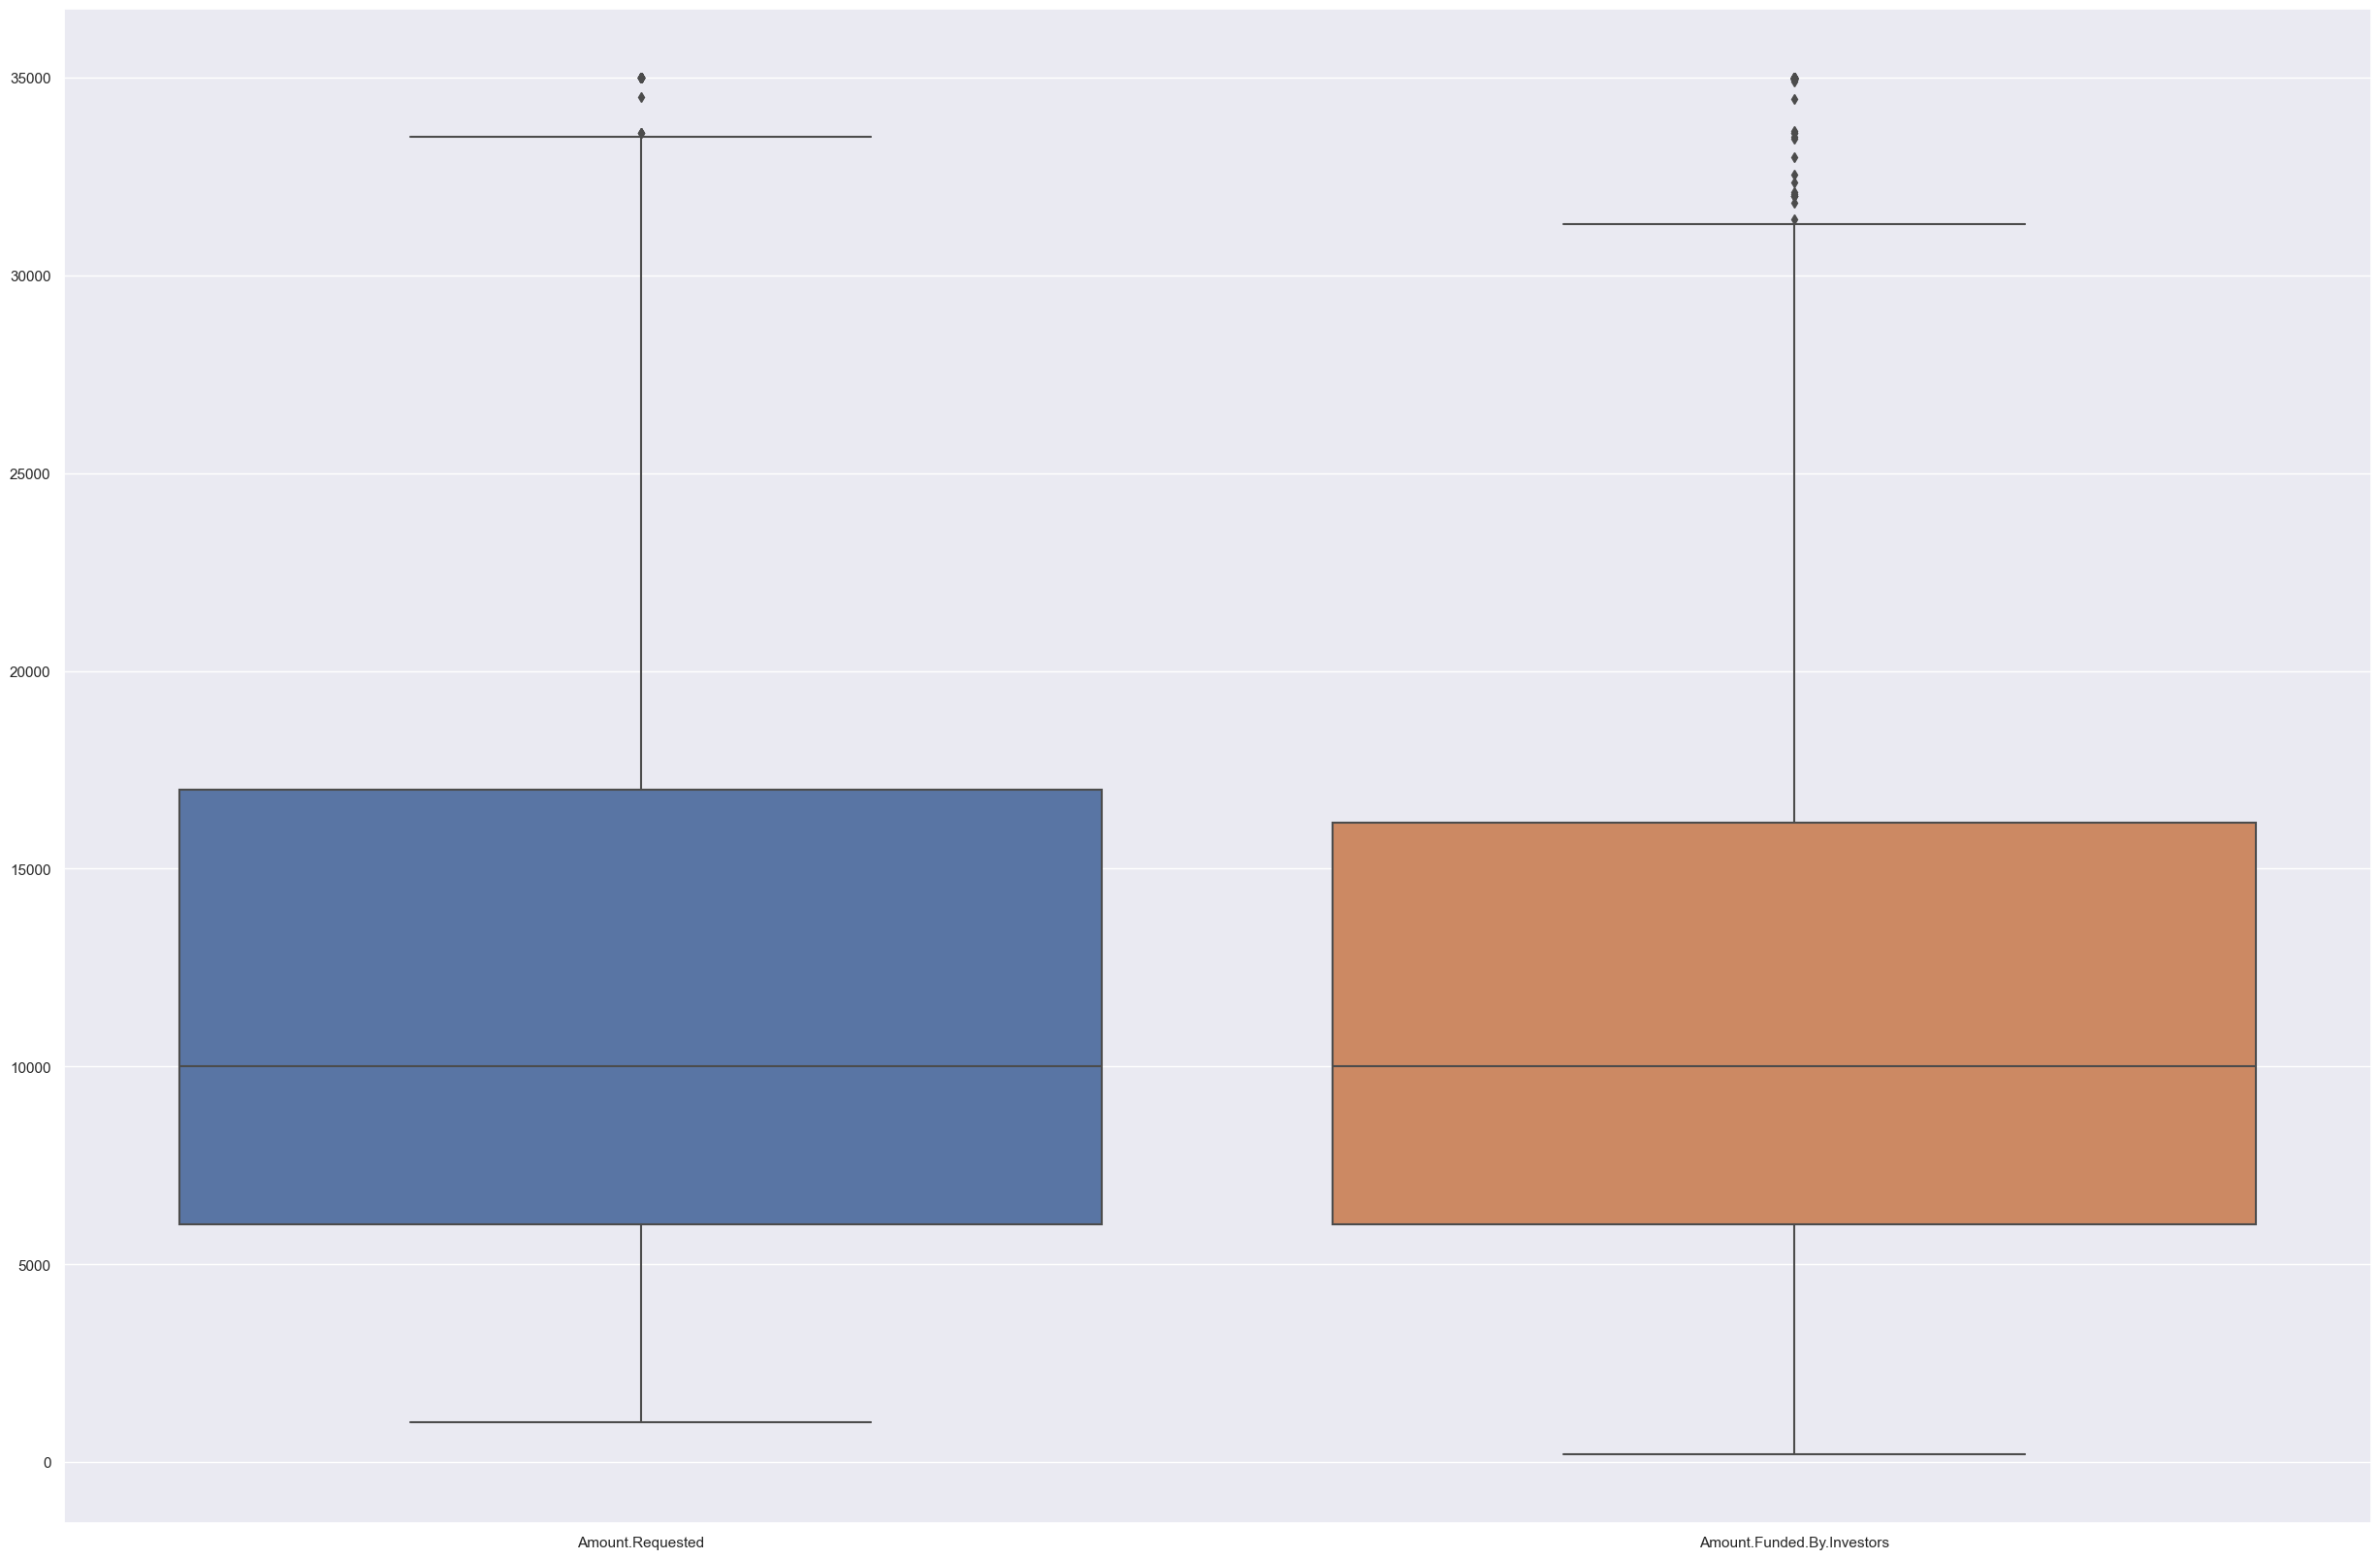

In [26]:
sns.boxplot(data=drop_df[['Amount.Requested', 'Amount.Funded.By.Investors']]) # v = vertical

<Axes: xlabel='Loan.Length', ylabel='Interest.Rate'>

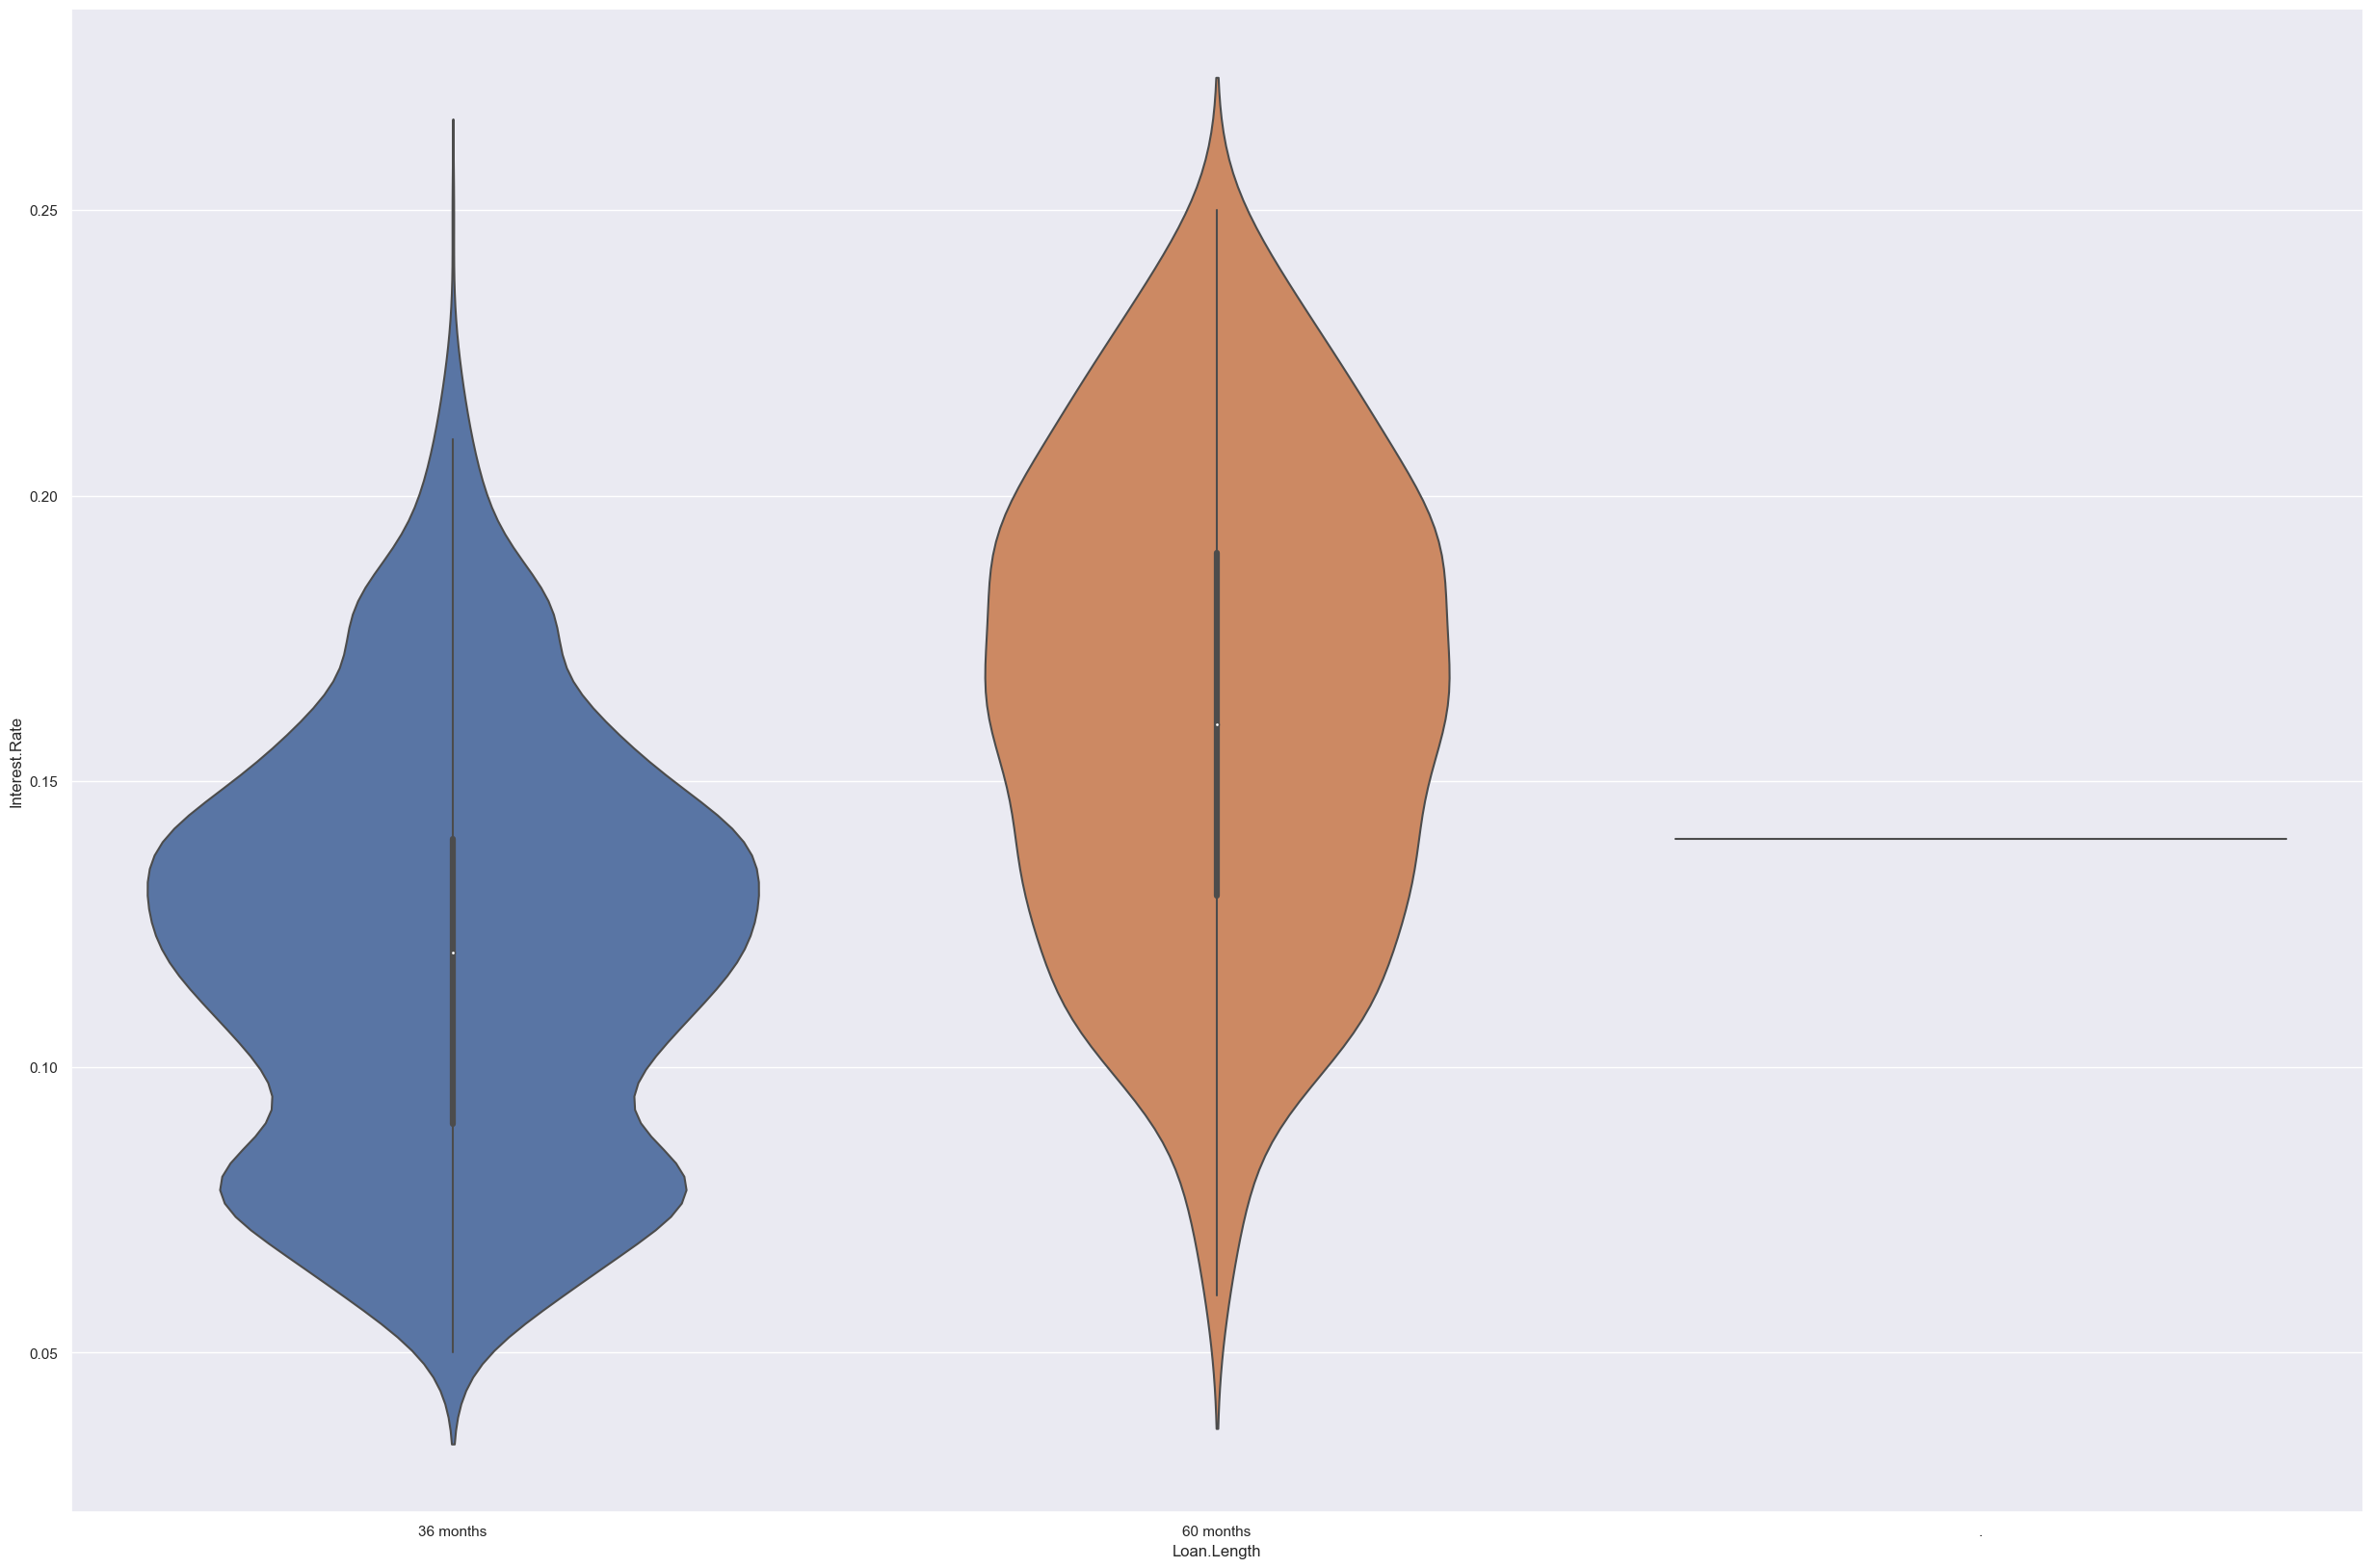

In [27]:
sns.violinplot(x=drop_df['Loan.Length'],y=df[ 'Interest.Rate'])

In [21]:
drop_df['Loan.Length'].unique()

array(['36 months', '60 months', '.'], dtype=object)

In [22]:
drop_df.iloc[62]  #Loan.Length

ID                                           85893.0
Amount.Requested                               13500
Amount.Funded.By.Investors                   13500.0
Interest.Rate                                   0.14
Loan.Length                                        .
Loan.Purpose                      debt_consolidation
Debt.To.Income.Ratio                            0.32
Home.Ownership                                  RENT
Monthly.Income                               4166.67
Open.CREDIT.Lines                                 11
Revolving.CREDIT.Balance                       31168
Inquiries.in.the.Last.6.Months                     0
Employment.Length                             1 year
Name: 62, dtype: object

In [23]:
df_replace = drop_df
df_replace.loc[df_replace['Loan.Length'] == '.', 'Loan.Length'] = '36 months'

In [24]:
df_replace.iloc[62]

ID                                           85893.0
Amount.Requested                               13500
Amount.Funded.By.Investors                   13500.0
Interest.Rate                                   0.14
Loan.Length                                36 months
Loan.Purpose                      debt_consolidation
Debt.To.Income.Ratio                            0.32
Home.Ownership                                  RENT
Monthly.Income                               4166.67
Open.CREDIT.Lines                                 11
Revolving.CREDIT.Balance                       31168
Inquiries.in.the.Last.6.Months                     0
Employment.Length                             1 year
Name: 62, dtype: object

<Axes: xlabel='Loan.Length', ylabel='Interest.Rate'>

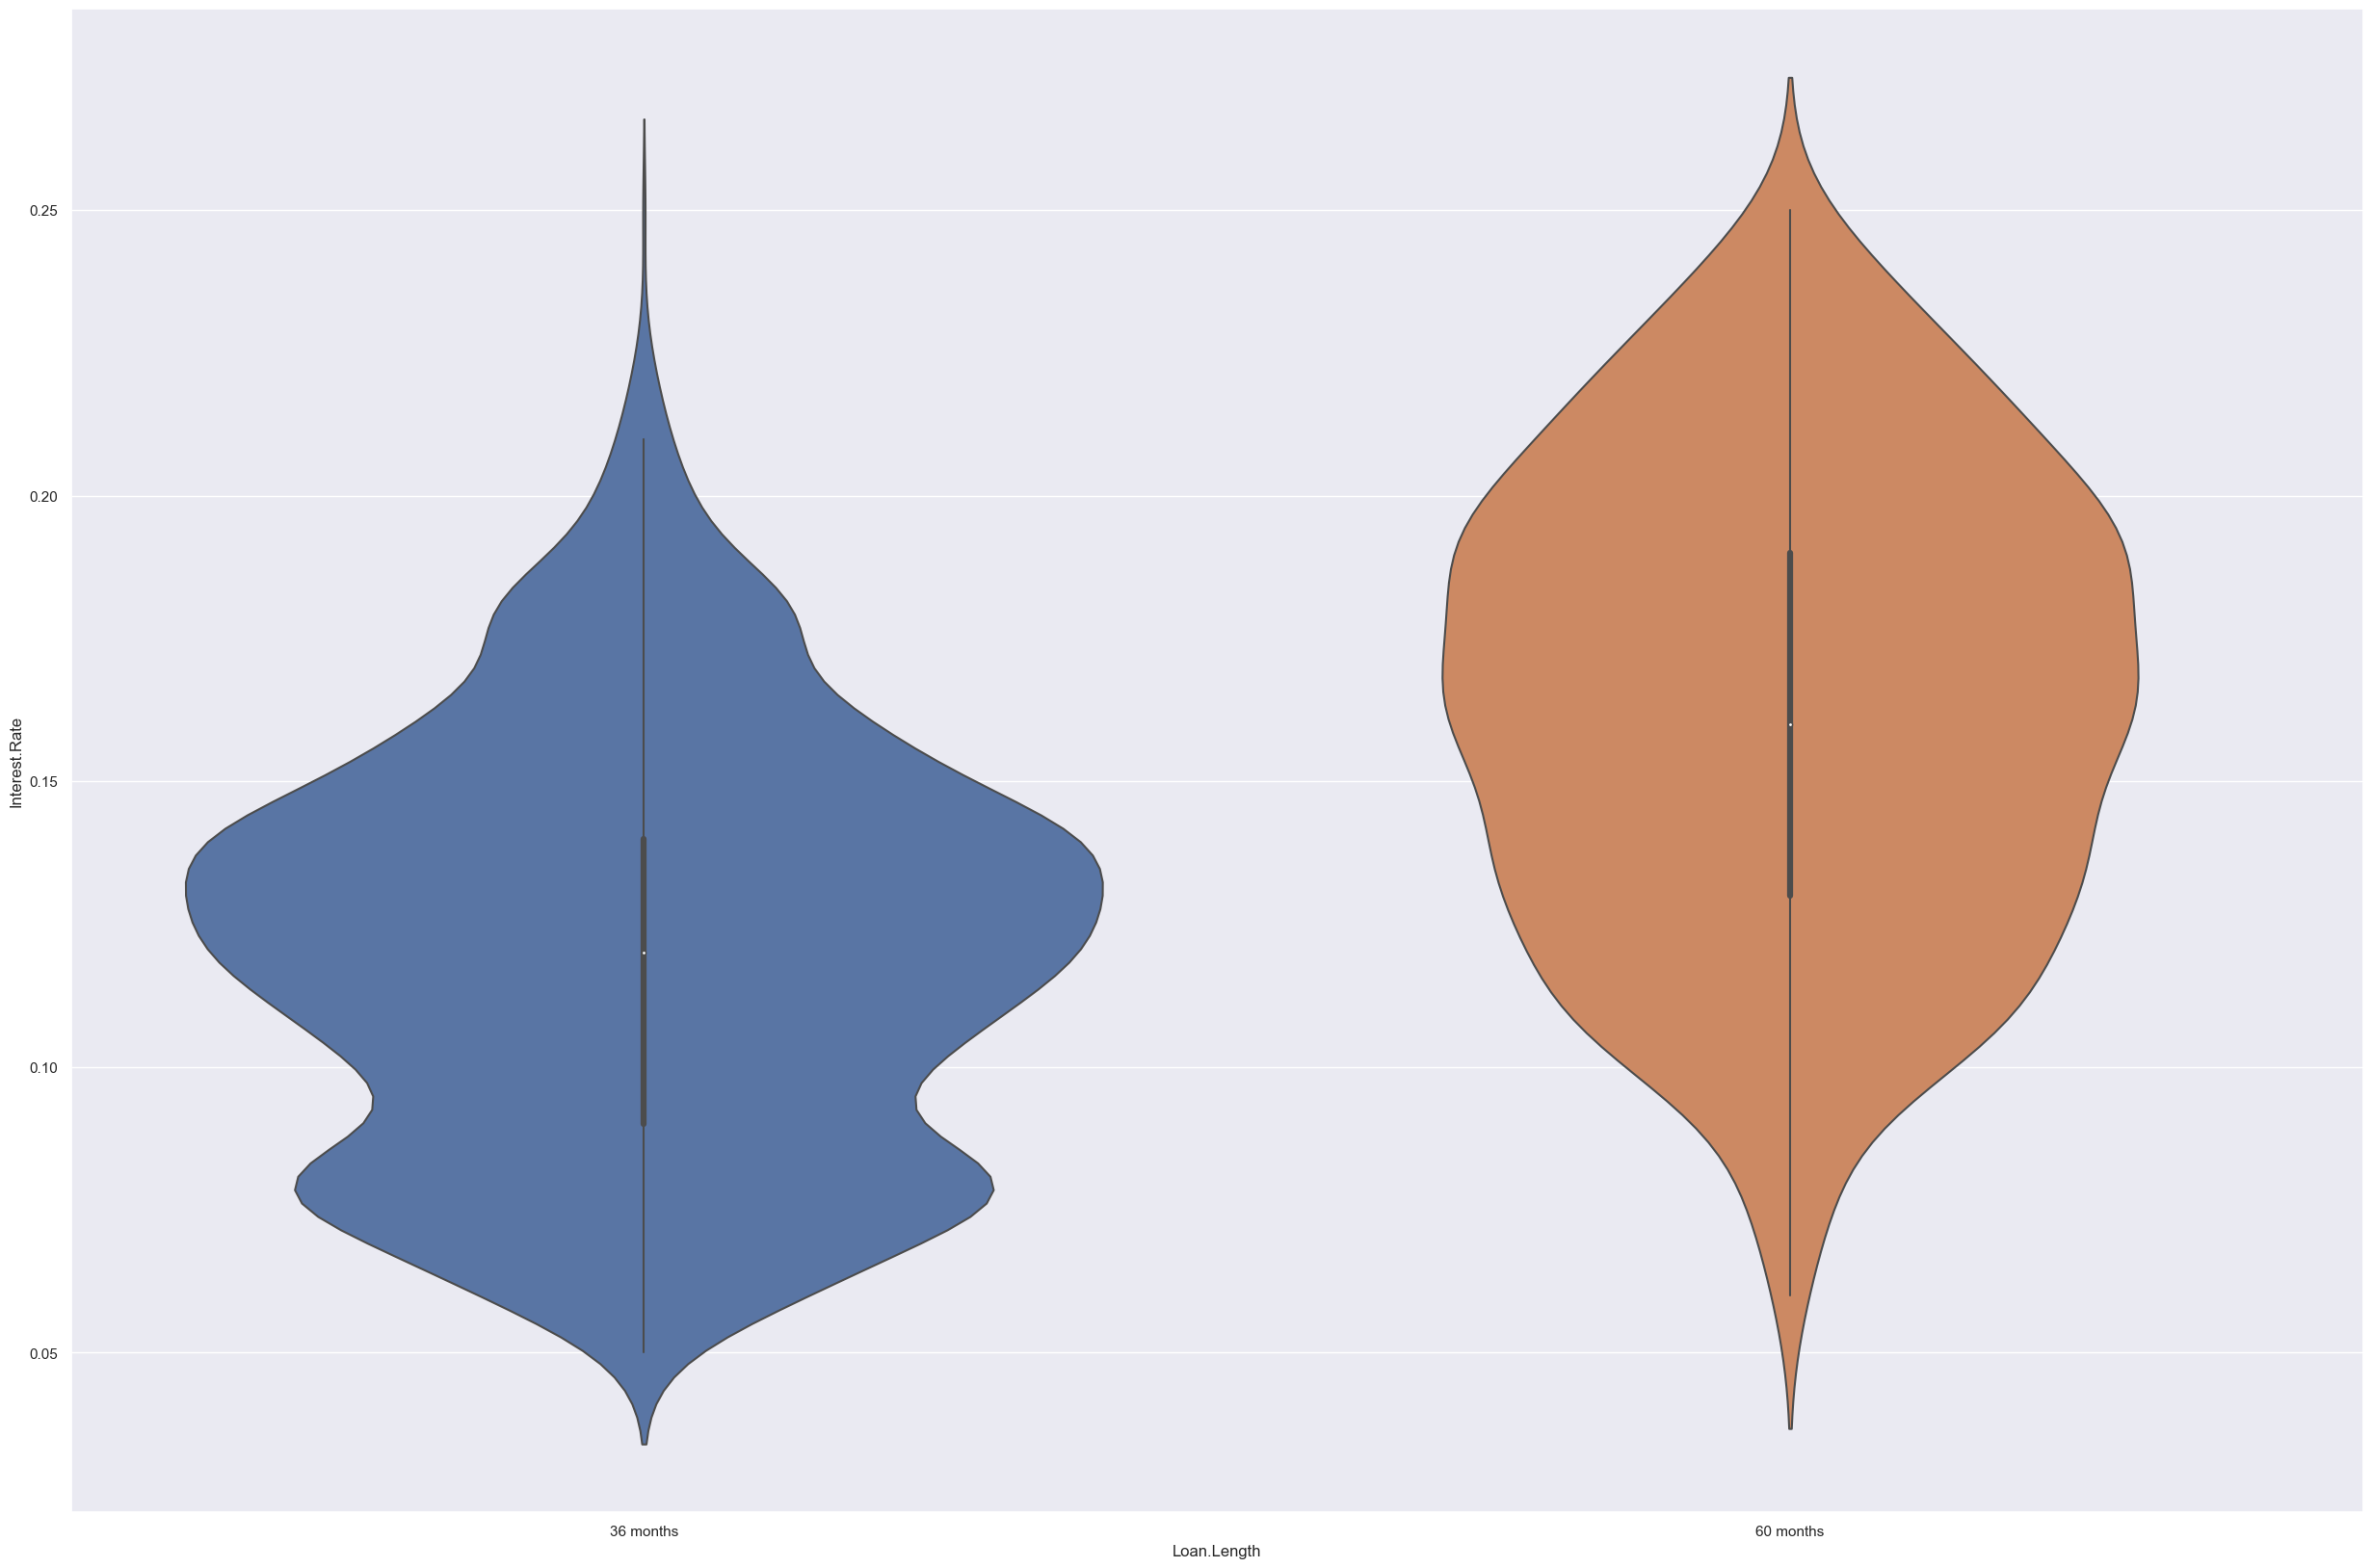

In [32]:
sns.violinplot(x=df_replace['Loan.Length'],y=df[ 'Interest.Rate'])

<Axes: xlabel='Home.Ownership', ylabel='Interest.Rate'>

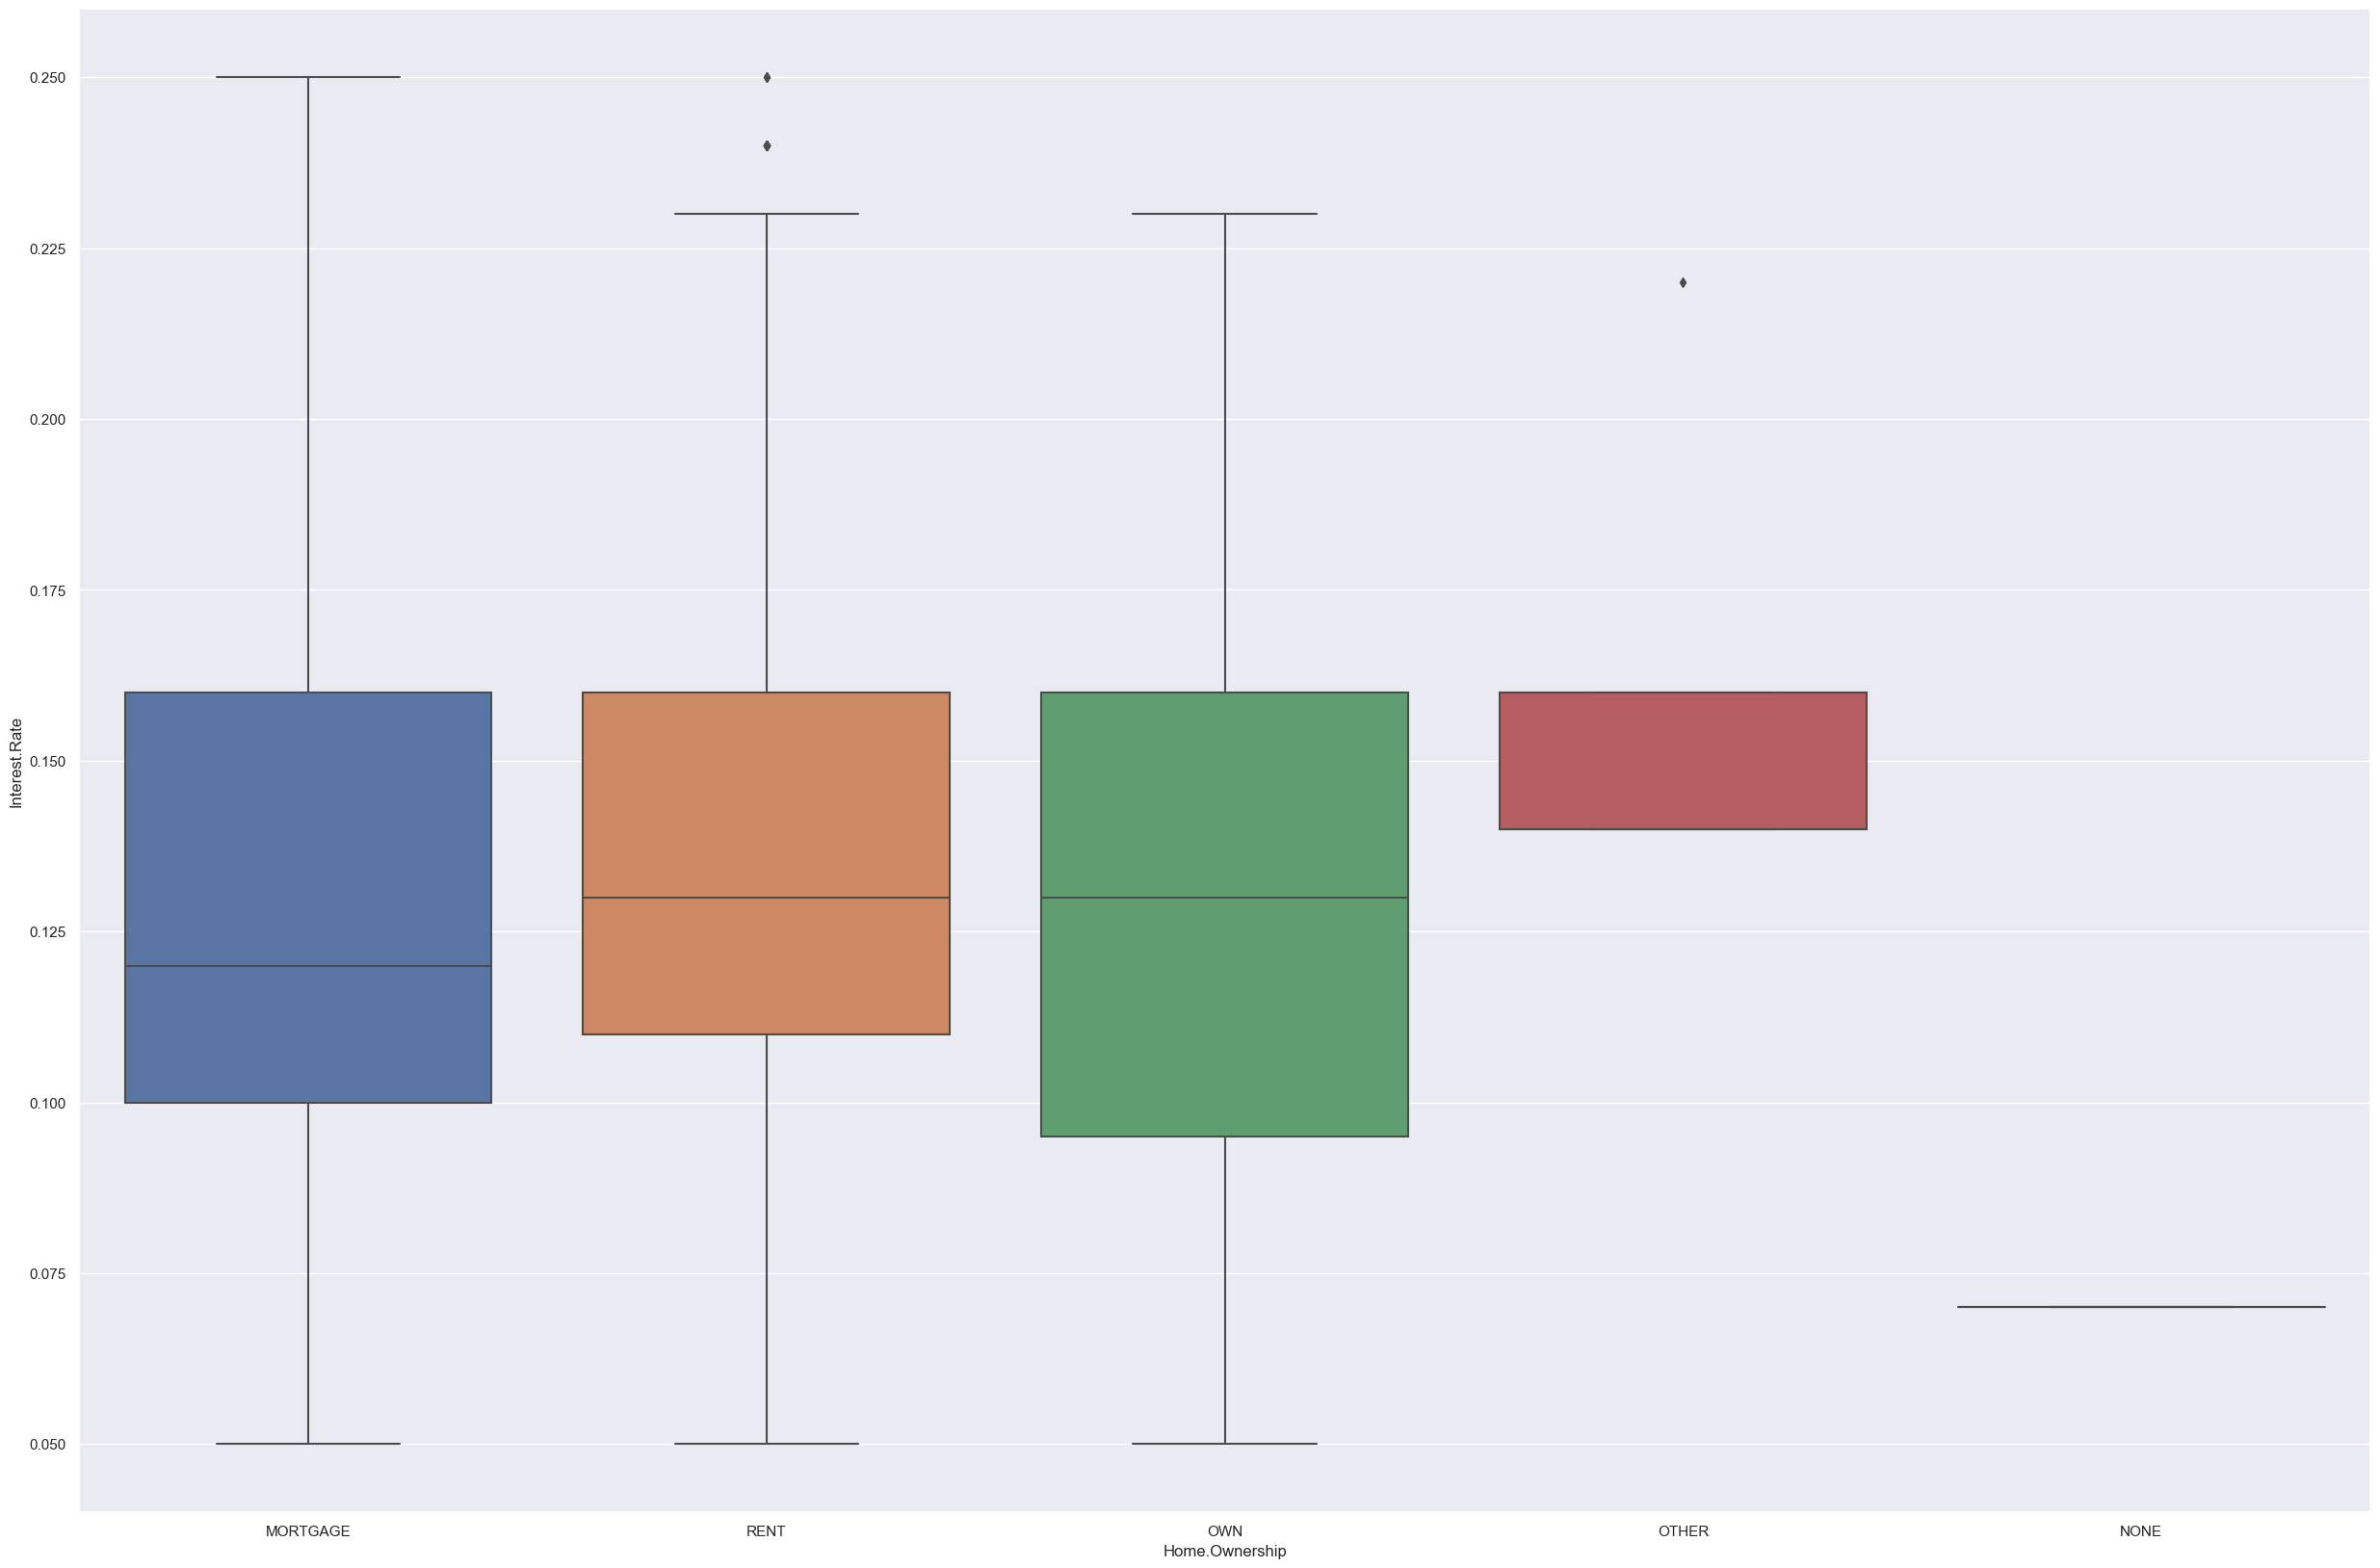

In [25]:
sns.boxplot(x=df_replace['Home.Ownership'],y=df[ 'Interest.Rate'])

In [26]:
drop_df1=df_replace

In [27]:
drop_df1['Home.Ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [28]:
drop_df1 = df_replace[df_replace['Home.Ownership'] != 'NONE']

<Axes: xlabel='Home.Ownership', ylabel='Interest.Rate'>

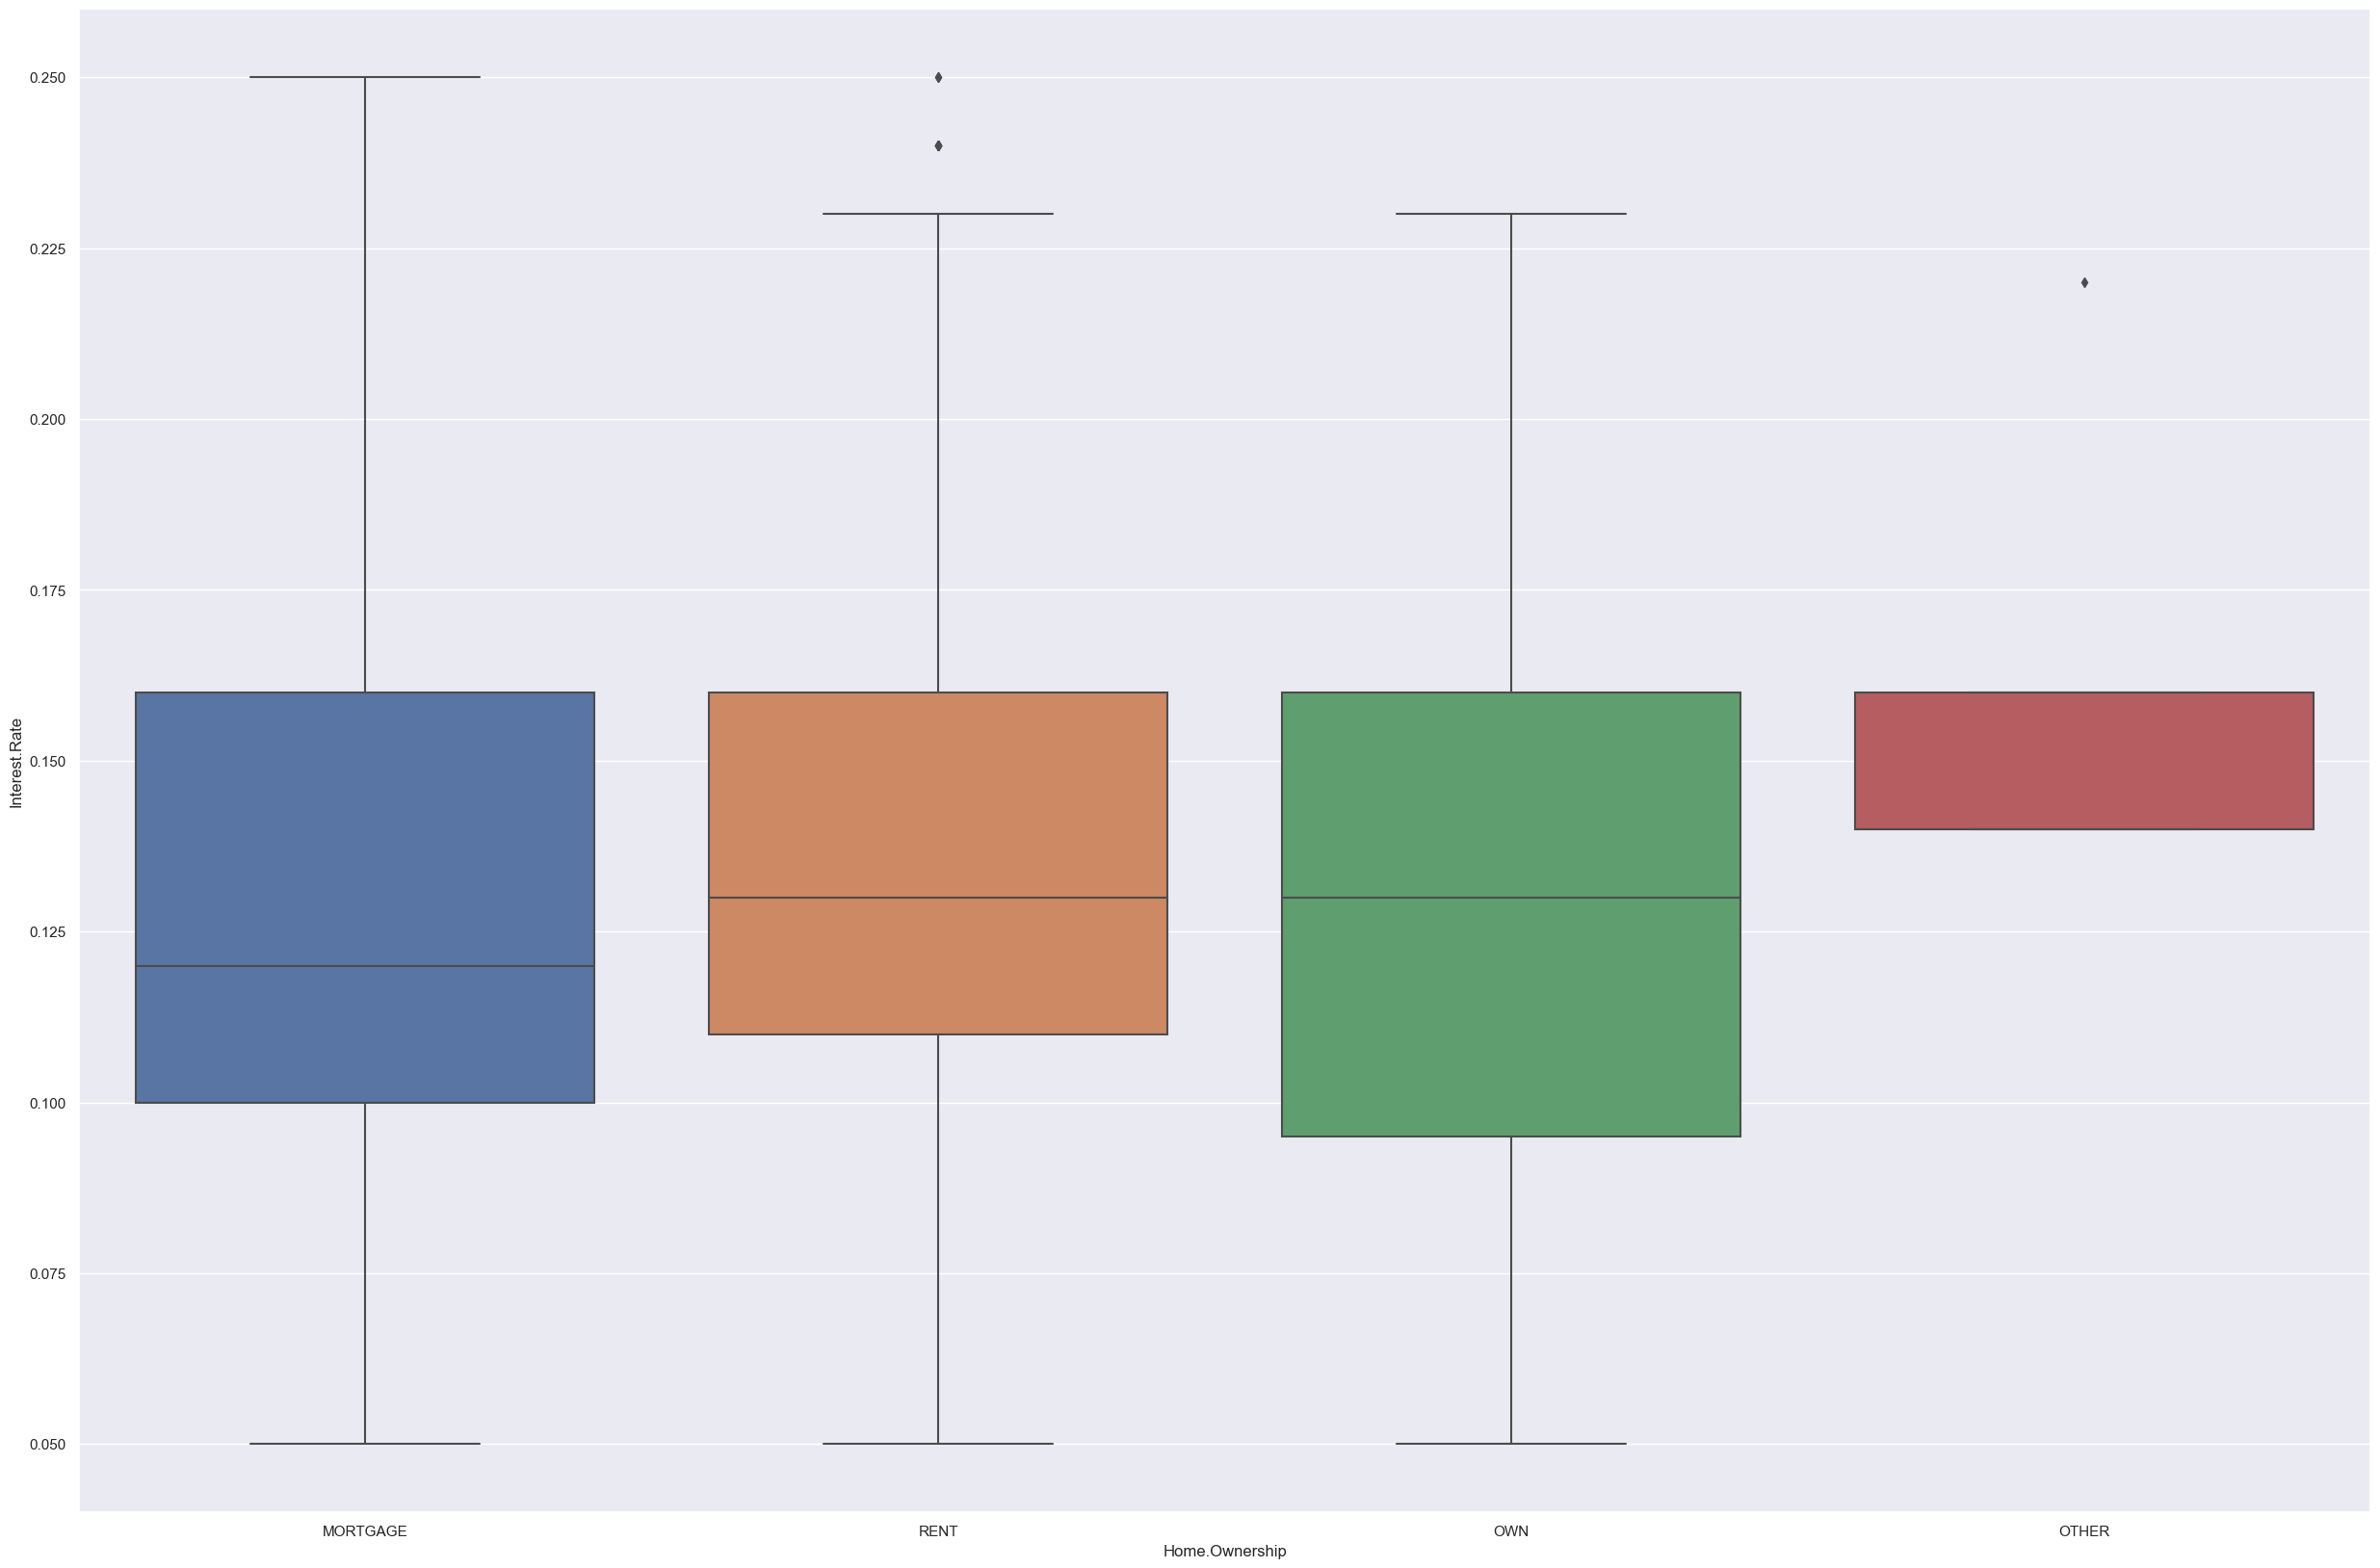

In [29]:
sns.boxplot(x=drop_df1['Home.Ownership'],y=df[ 'Interest.Rate'])

<Axes: xlabel='Inquiries.in.the.Last.6.Months', ylabel='Interest.Rate'>

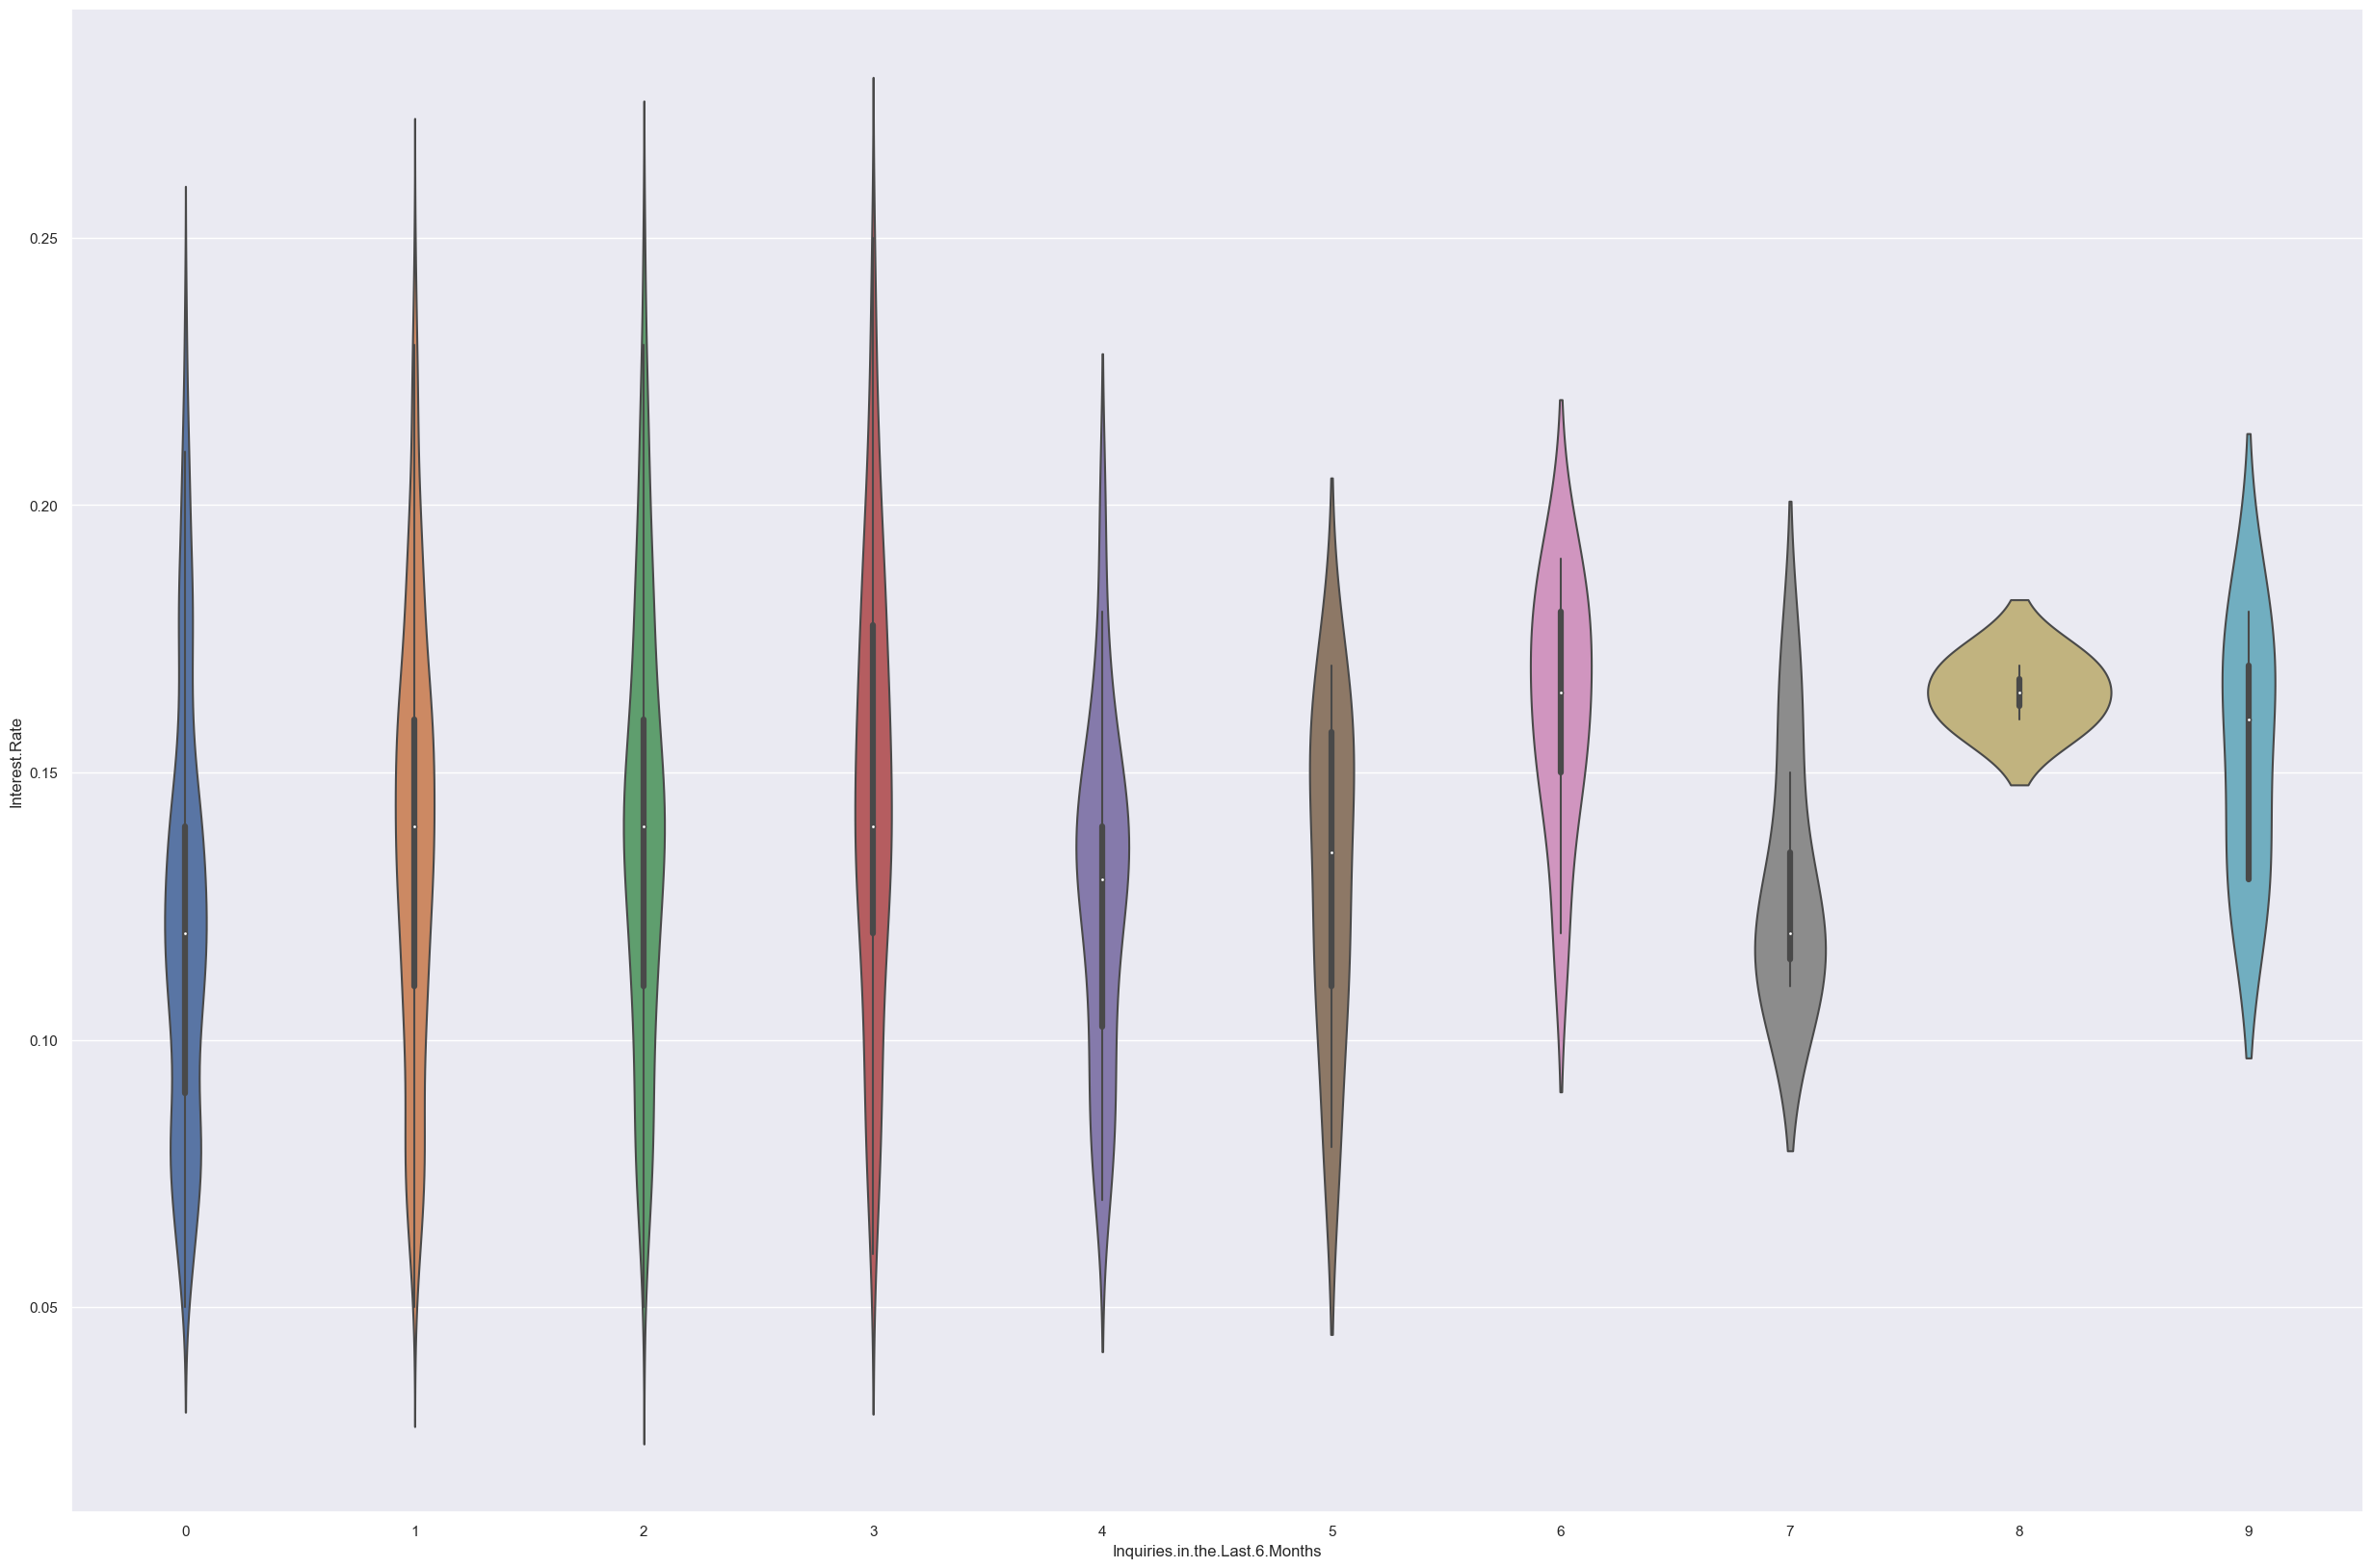

In [38]:
sns.violinplot(x=drop_df1[ 'Inquiries.in.the.Last.6.Months'],y=df[ 'Interest.Rate'])

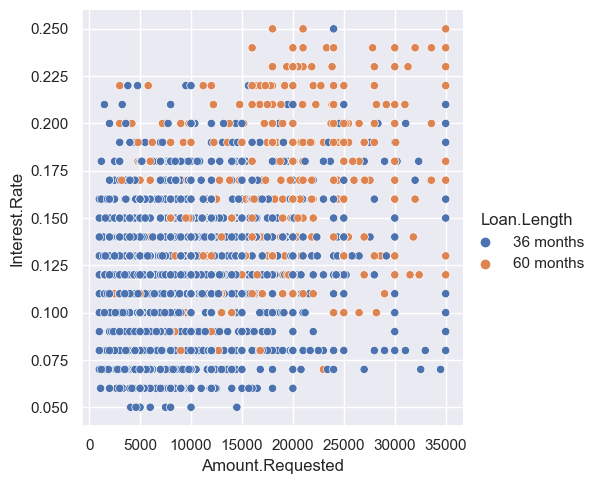

In [39]:
sns.relplot(x='Amount.Requested',y='Interest.Rate',hue='Loan.Length',data=drop_df1)

In [30]:
## WE need continuous variables for regression 
## so we need to split the dataset as numeric and categorical
df_num = drop_df1[['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
'Debt.To.Income.Ratio','Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
'Inquiries.in.the.Last.6.Months'
]]

In [31]:
df_num.head()

Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  \
0             20000                     20000.0           0.09   
1             19200                     19200.0           0.12   
2             35000                     35000.0           0.22   
3             10000                      9975.0           0.10   
4             12000                     12000.0           0.12   

   Debt.To.Income.Ratio  Monthly.Income  Open.CREDIT.Lines  \
0                  0.15         6541.67                 14   
1                  0.28         4583.33                 12   
2                  0.24        11500.00                 14   
3                  0.14         3833.33                 10   
4                  0.19         3195.00                 11   

   Revolving.CREDIT.Balance  Inquiries.in.the.Last.6.Months  
0                     14272                               2  
1                     11140                               1  
2                     21977                               1  
3                      9346                               0  
4                     14469                               0

In [32]:
df_dummy = pd.get_dummies(drop_df1[['Loan.Length', 'Loan.Purpose', 'Home.Ownership', 'Employment.Length']])

In [33]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417 entries, 0 to 2499
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Loan.Length_36 months            2417 non-null   uint8
 1   Loan.Length_60 months            2417 non-null   uint8
 2   Loan.Purpose_car                 2417 non-null   uint8
 3   Loan.Purpose_credit_card         2417 non-null   uint8
 4   Loan.Purpose_debt_consolidation  2417 non-null   uint8
 5   Loan.Purpose_educational         2417 non-null   uint8
 6   Loan.Purpose_home_improvement    2417 non-null   uint8
 7   Loan.Purpose_house               2417 non-null   uint8
 8   Loan.Purpose_major_purchase      2417 non-null   uint8
 9   Loan.Purpose_medical             2417 non-null   uint8
 10  Loan.Purpose_moving              2417 non-null   uint8
 11  Loan.Purpose_other               2417 non-null   uint8
 12  Loan.Purpose_renewable_energy    2417 non-null  

In [34]:
df_final=pd.concat([df_num, df_dummy], axis = 1) # axis =1 (JOIN THE DATAFRAME COLUMN-WISE)

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417 entries, 0 to 2499
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount.Requested                 2417 non-null   int64  
 1   Amount.Funded.By.Investors       2417 non-null   float64
 2   Interest.Rate                    2417 non-null   float64
 3   Debt.To.Income.Ratio             2417 non-null   float64
 4   Monthly.Income                   2417 non-null   float64
 5   Open.CREDIT.Lines                2417 non-null   int64  
 6   Revolving.CREDIT.Balance         2417 non-null   int64  
 7   Inquiries.in.the.Last.6.Months   2417 non-null   int64  
 8   Loan.Length_36 months            2417 non-null   uint8  
 9   Loan.Length_60 months            2417 non-null   uint8  
 10  Loan.Purpose_car                 2417 non-null   uint8  
 11  Loan.Purpose_credit_card         2417 non-null   uint8  
 12  Loan.Purpose_debt_co

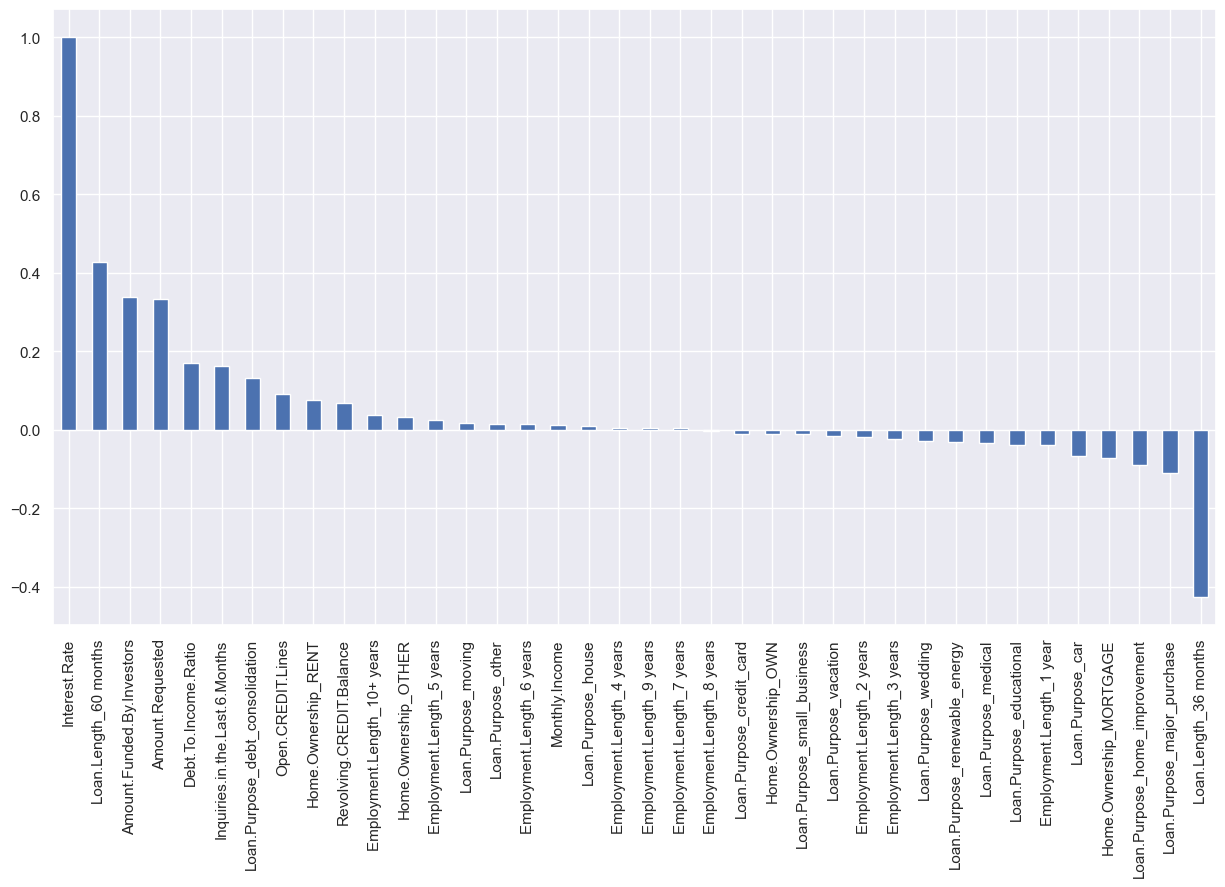

In [36]:
# correlation of 'churn' with other variables
plt.figure(figsize=(15,8))
df_final.corr()['Interest.Rate'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [37]:
df_final.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Loan.Length_36 months', 'Loan.Length_60 months', 'Loan.Purpose_car',
       'Loan.Purpose_credit_card', 'Loan.Purpose_debt_consolidation',
       'Loan.Purpose_educational', 'Loan.Purpose_home_improvement',
       'Loan.Purpose_house', 'Loan.Purpose_major_purchase',
       'Loan.Purpose_medical', 'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding',
       'Home.Ownership_MORTGAGE', 'Home.Ownership_OTHER', 'Home.Ownership_OWN',
       'Home.Ownership_RENT', 'Employment.Length_1 year',
       'Employment.Length_10+ years', 'Employment.Length_2 years',
       'Employment.Length_3 years', 'Employment.Length_4 years',
       'Employment.Length_5 years', 'Em

In [38]:
X=df_final[['Amount.Requested', 'Amount.Funded.By.Investors',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Loan.Length_36 months', 'Loan.Length_60 months', 'Loan.Purpose_car',
       'Loan.Purpose_credit_card', 'Loan.Purpose_debt_consolidation',
       'Loan.Purpose_educational', 'Loan.Purpose_home_improvement',
       'Loan.Purpose_house', 'Loan.Purpose_major_purchase',
       'Loan.Purpose_medical', 'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding',
       'Home.Ownership_MORTGAGE', 'Home.Ownership_OTHER', 'Home.Ownership_OWN',
       'Home.Ownership_RENT', 'Employment.Length_1 year',
       'Employment.Length_10+ years', 'Employment.Length_2 years',
       'Employment.Length_3 years', 'Employment.Length_4 years',
       'Employment.Length_5 years', 'Employment.Length_6 years',
       'Employment.Length_7 years', 'Employment.Length_8 years',
       'Employment.Length_9 years']]

In [39]:
Y=df_final[['Interest.Rate']]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test =train_test_split(df_final.drop('Interest.Rate',axis=1),df_final['Interest.Rate'],random_state=42,test_size=0.3)

In [41]:
x_train.head()

Amount.Requested  Amount.Funded.By.Investors  Debt.To.Income.Ratio  \
776              12000                     12000.0                  0.17   
448              24000                     23975.0                  0.16   
1604              2700                      2700.0                  0.20   
2191             10000                      9950.0                  0.14   
2202             20000                     20000.0                  0.33   

      Monthly.Income  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
776          9166.67                 11                     25165   
448          5416.67                 11                     17882   
1604         3958.33                 14                     13159   
2191         3125.00                  5                       417   
2202         8666.67                  9                     33067   

      Inquiries.in.the.Last.6.Months  Loan.Length_36 months  \
776                                0                      0   
448                                0                      1   
1604                               1                      1   
2191                               2                      1   
2202                               0                      1   

      Loan.Length_60 months  Loan.Purpose_car  ...  Employment.Length_1 year  \
776                       1                 0  ...                         0   
448                       0                 0  ...                         0   
1604                      0                 0  ...                         0   
2191                      0                 0  ...                         1   
2202                      0                 0  ...                         0   

      Employment.Length_10+ years  Employment.Length_2 years  \
776                             0                          1   
448                             1                          0   
1604                            0                          0   
2191                            0                          0   
2202                            0                          0   

      Employment.Length_3 years  Employment.Length_4 years  \
776                           0                          0   
448                           0                          0   
1604                          0                          0   
2191                          0                          0   
2202                          1                          0   

      Employment.Length_5 years  Employment.Length_6 years  \
776                           0                          0   
448                           0                          0   
1604                          0                          0   
2191                          0                          0   
2202                          0                          0   

      Employment.Length_7 years  Employment.Length_8 years  \
776                           0                          0   
448                           0                          0   
1604                          0                          1   
2191                          0                          0   
2202                          0                          0   

      Employment.Length_9 years  
776                           0  
448                           0  
1604                          0  
2191                          0  
2202                          0  

[5 rows x 37 columns]

In [42]:
x_test.head()

Amount.Requested  Amount.Funded.By.Investors  Debt.To.Income.Ratio  \
428              11500                     11500.0                  0.18   
207              20000                     20000.0                  0.20   
1732             17825                     17825.0                  0.19   
2414             24000                     23950.0                  0.29   
1077              5000                      5000.0                  0.21   

      Monthly.Income  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
428          2916.67                 14                     13851   
207          4625.00                 14                     31335   
1732         6250.00                 12                     27554   
2414        10737.50                 26                     34602   
1077         3000.00                  4                     12841   

      Inquiries.in.the.Last.6.Months  Loan.Length_36 months  \
428                                1                      1   
207                                1                      1   
1732                               0                      1   
2414                               2                      1   
1077                               0                      1   

      Loan.Length_60 months  Loan.Purpose_car  ...  Employment.Length_1 year  \
428                       0                 0  ...                         0   
207                       0                 0  ...                         0   
1732                      0                 0  ...                         0   
2414                      0                 0  ...                         0   
1077                      0                 0  ...                         0   

      Employment.Length_10+ years  Employment.Length_2 years  \
428                             0                          0   
207                             1                          0   
1732                            1                          0   
2414                            1                          0   
1077                            0                          0   

      Employment.Length_3 years  Employment.Length_4 years  \
428                           0                          0   
207                           0                          0   
1732                          0                          0   
2414                          0                          0   
1077                          1                          0   

      Employment.Length_5 years  Employment.Length_6 years  \
428                           1                          0   
207                           0                          0   
1732                          0                          0   
2414                          0                          0   
1077                          0                          0   

      Employment.Length_7 years  Employment.Length_8 years  \
428                           0                          0   
207                           0                          0   
1732                          0                          0   
2414                          0                          0   
1077                          0                          0   

      Employment.Length_9 years  
428                           0  
207                           0  
1732                          0  
2414                          0  
1077                          0  

[5 rows x 37 columns]

## Feature Selection using SelectKBest

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [44]:
info = mutual_info_regression(x_train,y_train)
info

array([0.08307548, 0.07626053, 0.03942491, 0.01233439, 0.01200546,
       0.        , 0.01559837, 0.11962023, 0.13259148, 0.        ,
       0.04110195, 0.01040448, 0.        , 0.00199495, 0.        ,
       0.00292941, 0.01026427, 0.00749006, 0.        , 0.00851247,
       0.        , 0.        , 0.        , 0.        , 0.0015655 ,
       0.01142139, 0.00094474, 0.00417454, 0.        , 0.        ,
       0.01046361, 0.03101777, 0.        , 0.00481704, 0.00700382,
       0.00783942, 0.0156024 ])

In [45]:
info = pd.Series(info,index=x_train.columns)
info

Amount.Requested                   0.083075
Amount.Funded.By.Investors         0.076261
Debt.To.Income.Ratio               0.039425
Monthly.Income                     0.012334
Open.CREDIT.Lines                  0.012005
Revolving.CREDIT.Balance           0.000000
Inquiries.in.the.Last.6.Months     0.015598
Loan.Length_36 months              0.119620
Loan.Length_60 months              0.132591
Loan.Purpose_car                   0.000000
Loan.Purpose_credit_card           0.041102
Loan.Purpose_debt_consolidation    0.010404
Loan.Purpose_educational           0.000000
Loan.Purpose_home_improvement      0.001995
Loan.Purpose_house                 0.000000
Loan.Purpose_major_purchase        0.002929
Loan.Purpose_medical               0.010264
Loan.Purpose_moving                0.007490
Loan.Purpose_other                 0.000000
Loan.Purpose_renewable_energy      0.008512
Loan.Purpose_small_business        0.000000
Loan.Purpose_vacation              0.000000
Loan.Purpose_wedding            

In [46]:
info.sort_values(ascending=False)

Loan.Length_60 months              0.132591
Loan.Length_36 months              0.119620
Amount.Requested                   0.083075
Amount.Funded.By.Investors         0.076261
Loan.Purpose_credit_card           0.041102
Debt.To.Income.Ratio               0.039425
Employment.Length_4 years          0.031018
Employment.Length_9 years          0.015602
Inquiries.in.the.Last.6.Months     0.015598
Monthly.Income                     0.012334
Open.CREDIT.Lines                  0.012005
Home.Ownership_OWN                 0.011421
Employment.Length_3 years          0.010464
Loan.Purpose_debt_consolidation    0.010404
Loan.Purpose_medical               0.010264
Loan.Purpose_renewable_energy      0.008512
Employment.Length_8 years          0.007839
Loan.Purpose_moving                0.007490
Employment.Length_7 years          0.007004
Employment.Length_6 years          0.004817
Employment.Length_1 year           0.004175
Loan.Purpose_major_purchase        0.002929
Loan.Purpose_home_improvement   

In [47]:
best_15 = SelectKBest(mutual_info_regression,k=15)
best_15.fit(x_train,y_train)

SelectKBest(k=15,
            score_func=<function mutual_info_regression at 0x0000013829D540D0>)

In [48]:
best_15.get_support()

array([ True,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False,  True, False,  True, False, False, False,
        True,  True, False,  True, False, False, False, False, False,
       False])

In [49]:
x_train = x_train[x_train.columns[best_15.get_support()]]

In [50]:
x_train.head()

Amount.Requested  Amount.Funded.By.Investors  Debt.To.Income.Ratio  \
776              12000                     12000.0                  0.17   
448              24000                     23975.0                  0.16   
1604              2700                      2700.0                  0.20   
2191             10000                      9950.0                  0.14   
2202             20000                     20000.0                  0.33   

      Monthly.Income  Open.CREDIT.Lines  Loan.Length_36 months  \
776          9166.67                 11                      0   
448          5416.67                 11                      1   
1604         3958.33                 14                      1   
2191         3125.00                  5                      1   
2202         8666.67                  9                      1   

      Loan.Length_60 months  Loan.Purpose_home_improvement  \
776                       1                              1   
448                       0                              0   
1604                      0                              0   
2191                      0                              0   
2202                      0                              0   

      Loan.Purpose_major_purchase  Loan.Purpose_other  Loan.Purpose_vacation  \
776                             0                   0                      0   
448                             0                   0                      0   
1604                            0                   0                      0   
2191                            0                   0                      0   
2202                            0                   0                      0   

      Home.Ownership_MORTGAGE  Employment.Length_1 year  \
776                         1                         0   
448                         1                         0   
1604                        1                         0   
2191                        0                         1   
2202                        0                         0   

      Employment.Length_10+ years  Employment.Length_3 years  
776                             0                          0  
448                             1                          0  
1604                            0                          0  
2191                            0                          0  
2202                            0                          1

In [51]:
x_test = x_test[x_test.columns[best_15.get_support()]]

In [52]:
x_test.head()

Amount.Requested  Amount.Funded.By.Investors  Debt.To.Income.Ratio  \
428              11500                     11500.0                  0.18   
207              20000                     20000.0                  0.20   
1732             17825                     17825.0                  0.19   
2414             24000                     23950.0                  0.29   
1077              5000                      5000.0                  0.21   

      Monthly.Income  Open.CREDIT.Lines  Loan.Length_36 months  \
428          2916.67                 14                      1   
207          4625.00                 14                      1   
1732         6250.00                 12                      1   
2414        10737.50                 26                      1   
1077         3000.00                  4                      1   

      Loan.Length_60 months  Loan.Purpose_home_improvement  \
428                       0                              0   
207                       0                              0   
1732                      0                              0   
2414                      0                              0   
1077                      0                              0   

      Loan.Purpose_major_purchase  Loan.Purpose_other  Loan.Purpose_vacation  \
428                             0                   0                      0   
207                             0                   0                      0   
1732                            0                   0                      0   
2414                            0                   0                      0   
1077                            0                   0                      0   

      Home.Ownership_MORTGAGE  Employment.Length_1 year  \
428                         0                         0   
207                         1                         0   
1732                        1                         0   
2414                        1                         0   
1077                        0                         0   

      Employment.Length_10+ years  Employment.Length_3 years  
428                             0                          0  
207                             1                          0  
1732                            1                          0  
2414                            1                          0  
1077                            0                          1

In [53]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(x_train, y_train)
print('Intercept is: ',lrm.intercept_)
print('Coeff_of determination R^2 is: ',lrm.score(x_train,y_train)) # R^2 is of train dataset
print("Coef for Variable are:\n",lrm.coef_)

Intercept is:  0.1253076918109914
Coeff_of determination R^2 is:  0.28327506873358854
Coef for Variable are:
 [ 6.47546692e-07  3.42567025e-07  6.15751241e-02 -4.21775011e-07
  2.55379436e-04 -1.88118610e-02  1.88118610e-02 -1.44284436e-02
 -1.75800632e-02  7.05492497e-03  1.87176026e-03 -9.92133481e-03
 -1.84661157e-03  3.70022560e-04 -4.95616661e-03]


In [54]:
y_pred = lrm.predict(x_test)
y_pred[0:5]

array([0.13131079, 0.13068642, 0.12672103, 0.14065796, 0.1191772 ])

In [55]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 0.029764228052732815
MSE 0.00130236335830888
RMSE 0.03608827175563939


In [56]:
from sklearn.metrics import r2_score
print("R-Squared of test_data : ",r2_score(y_test,y_pred))  ## This is for Test data
r2_linear=r2_score(y_test,y_pred)

R-Squared of test_data :  0.2161099194794558


In [57]:
# lets look at the other parameter using Stats Model
X_train_sm = x_train
X_train_sm = sm.add_constant(X_train_sm)
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest.Rate   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     47.32
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          1.58e-110
Time:                        17:04:00   Log-Likelihood:                 3272.2
No. Observations:                1691   AIC:                            -6514.
Df Residuals:                    1676   BIC:                            -6433.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0835      0.002     38.828      0.000       0.079       0.088
Amount.Requested               6.475e-07   4.11e-07      1.574      0.116   -1.59e-07    1.45e-06
Amount.Funded.By.Investors     3.426e-07   4.11e-07      0.834      0.404   -4.63e-07    1.15e-06
Debt.To.Income.Ratio              0.0616      0.013      4.735      0.000       0.036       0.087
Monthly.Income                -4.218e-07   2.25e-07     -1.870      0.062   -8.64e-07    2.05e-08
Open.CREDIT.Lines                 0.0003      0.000      1.209      0.227      -0.000       0.001
Loan.Length_36 months             0.0230      0.001     18.249      0.000       0.020       0.025
Loan.Length_60 months             0.0606      0.002     33.347      0.000       0.057       0.064
Loan.Purpose_home_improvement    -0.0144      0.004     -3.935      0.000      -0.022      -0.007
Loan.Purpose_major_purchase      -0.0176      0.004     -4.112      0.000      -0.026      -0.009
Loan.Purpose_other                0.0071      0.003      2.058      0.040       0.000       0.014
Loan.Purpose_vacation             0.0019      0.010      0.190      0.849      -0.017       0.021
Home.Ownership_MORTGAGE          -0.0099      0.002     -5.356      0.000      -0.014      -0.006
Employment.Length_1 year         -0.0018      0.002     -0.761      0.447      -0.007       0.003
Employment.Length_10+ years       0.0004      0.002      0.176      0.860      -0.004       0.004
Employment.Length_3 years        -0.0050      0.003     -1.649      0.099      -0.011       0.001
==============================================================================
Omnibus:                       42.958   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.723
Skew:                           0.067   Prob(JB):                     1.16e-05
Kurtosis:                       2.448   Cond. No.                     2.90e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

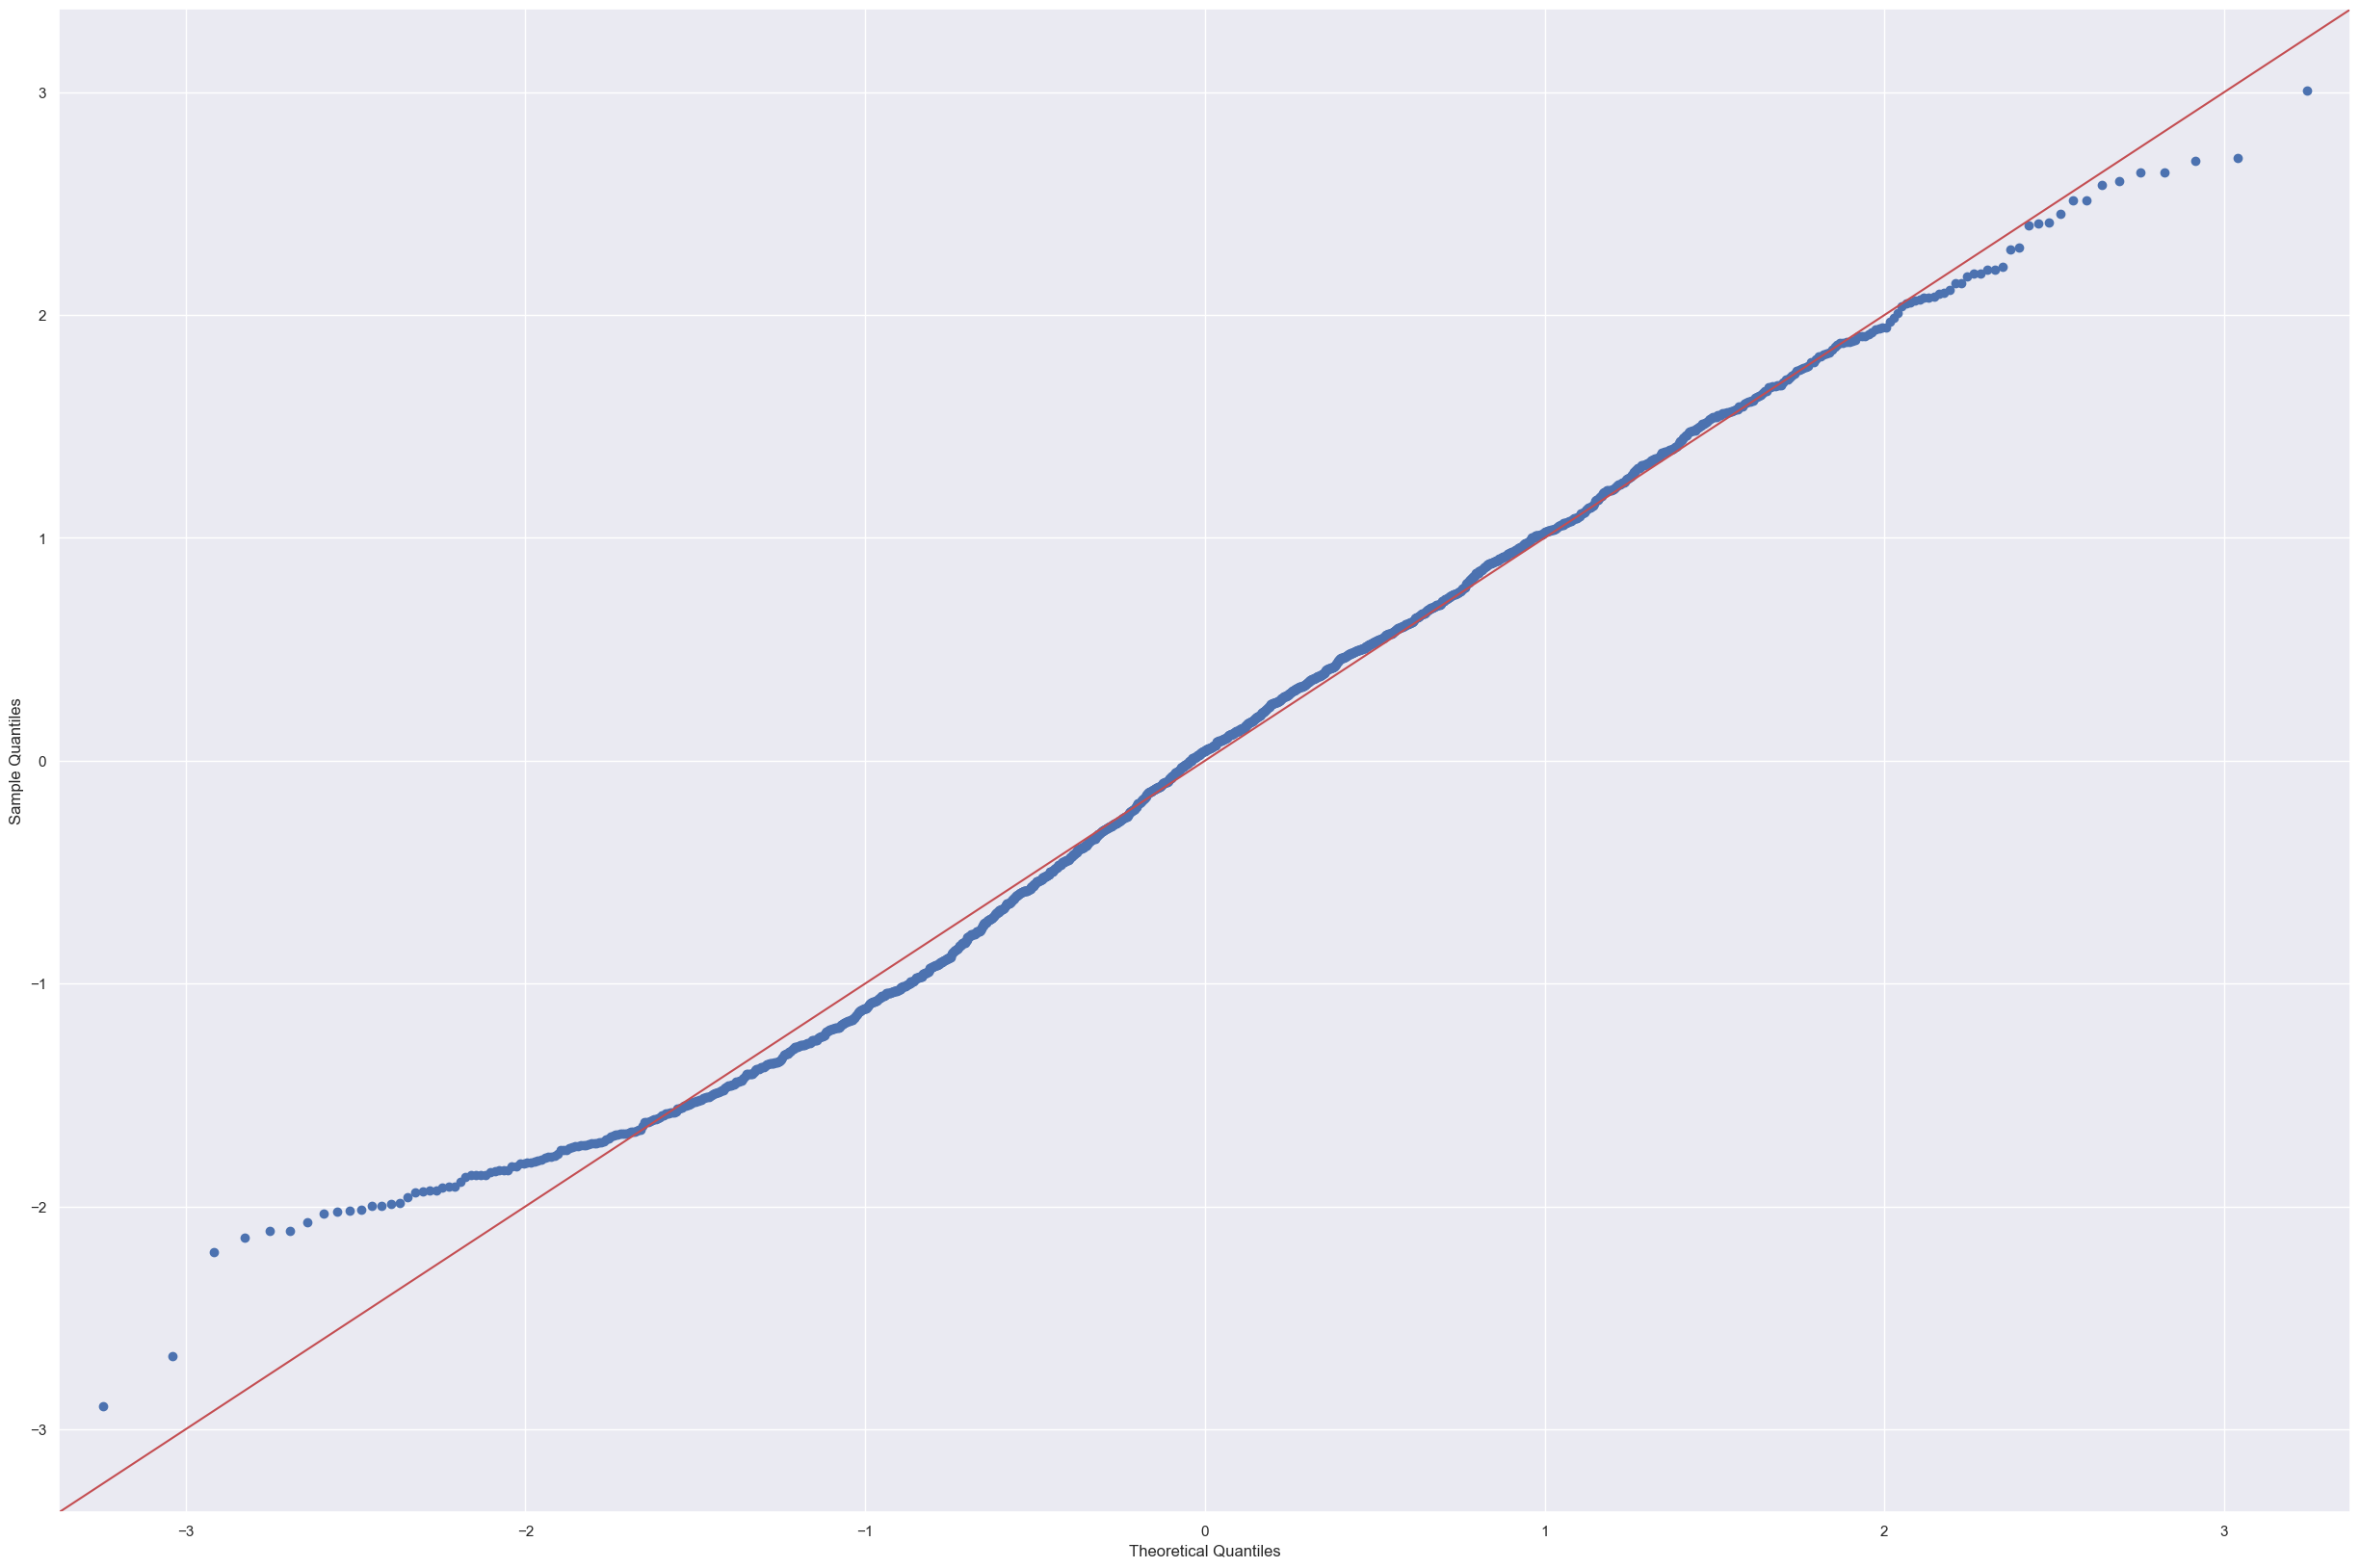

In [58]:
# define residual
res = model.resid
# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

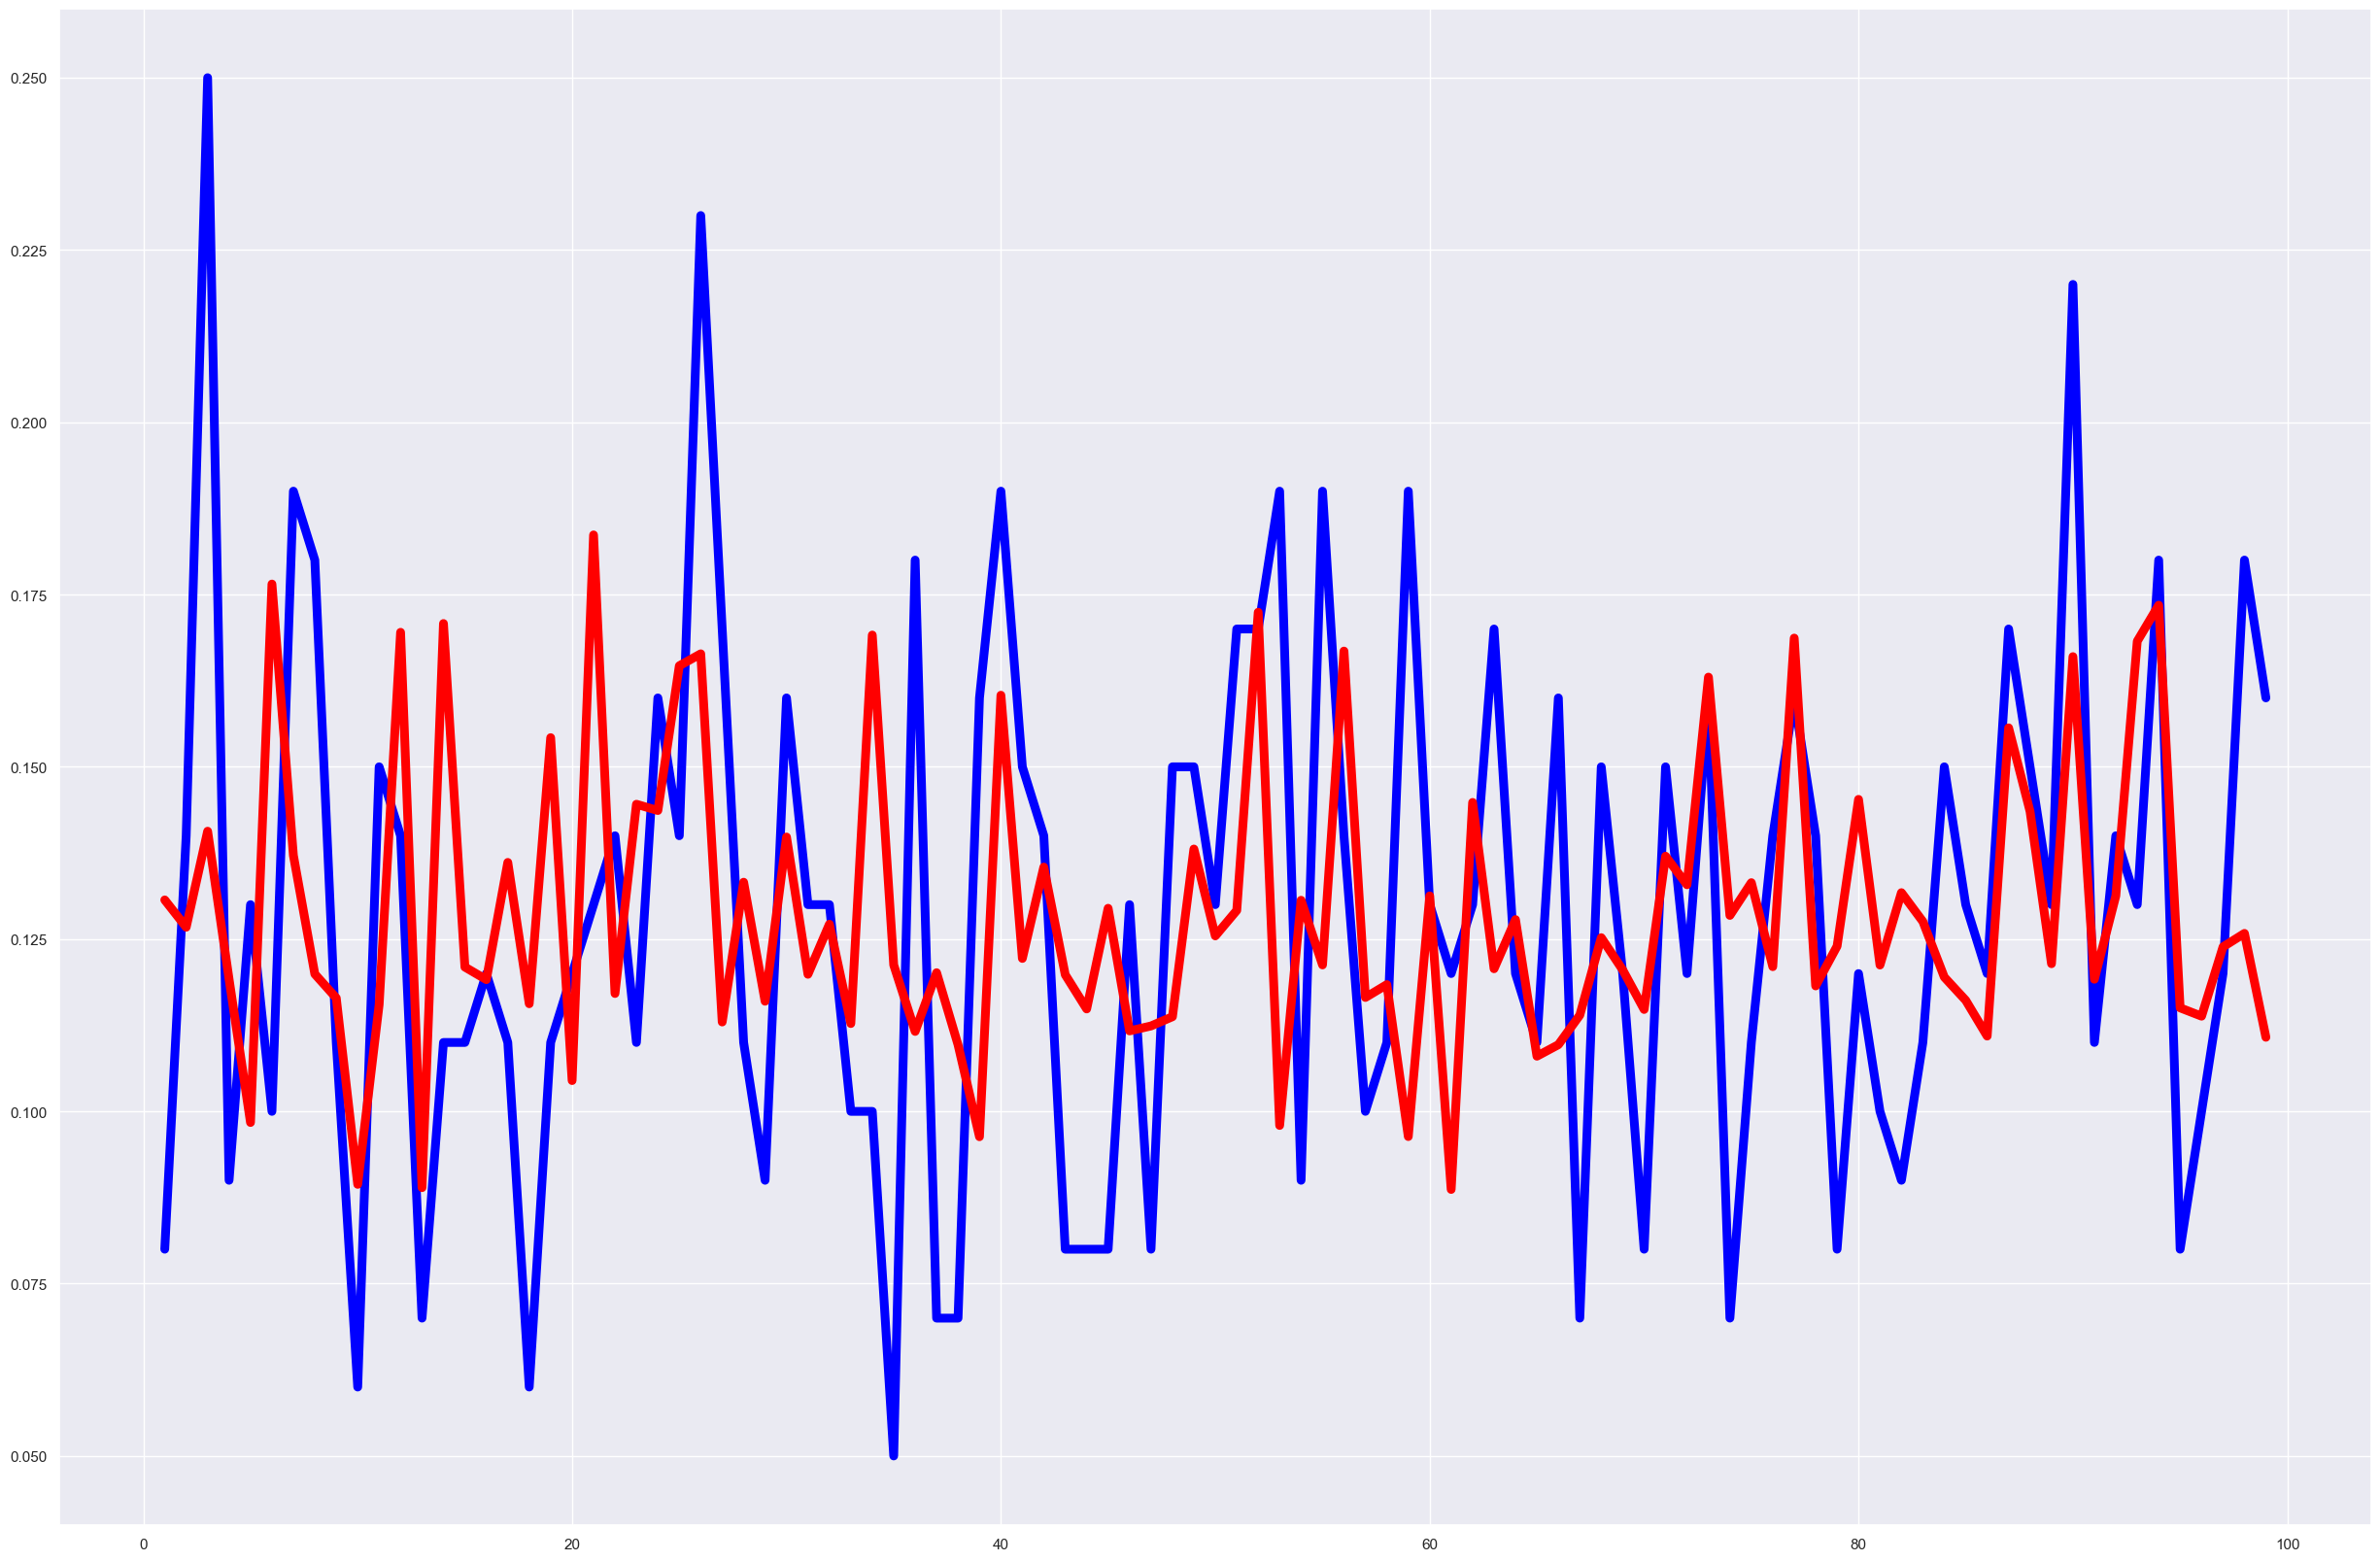

In [59]:
## Not a promising plot .. so let us plot actual and predicted.. Since there are many values let us look at 100 values
cnt=[i for i in range(1,100,1)]
fig = plt.figure()
plt.plot(cnt,y_test[1:100],color="blue", linewidth=6.5,linestyle="-")  #Actual
plt.plot(cnt,y_pred[1:100],color="red", linewidth=6.5,linestyle="-")   #predicted
plt.show()

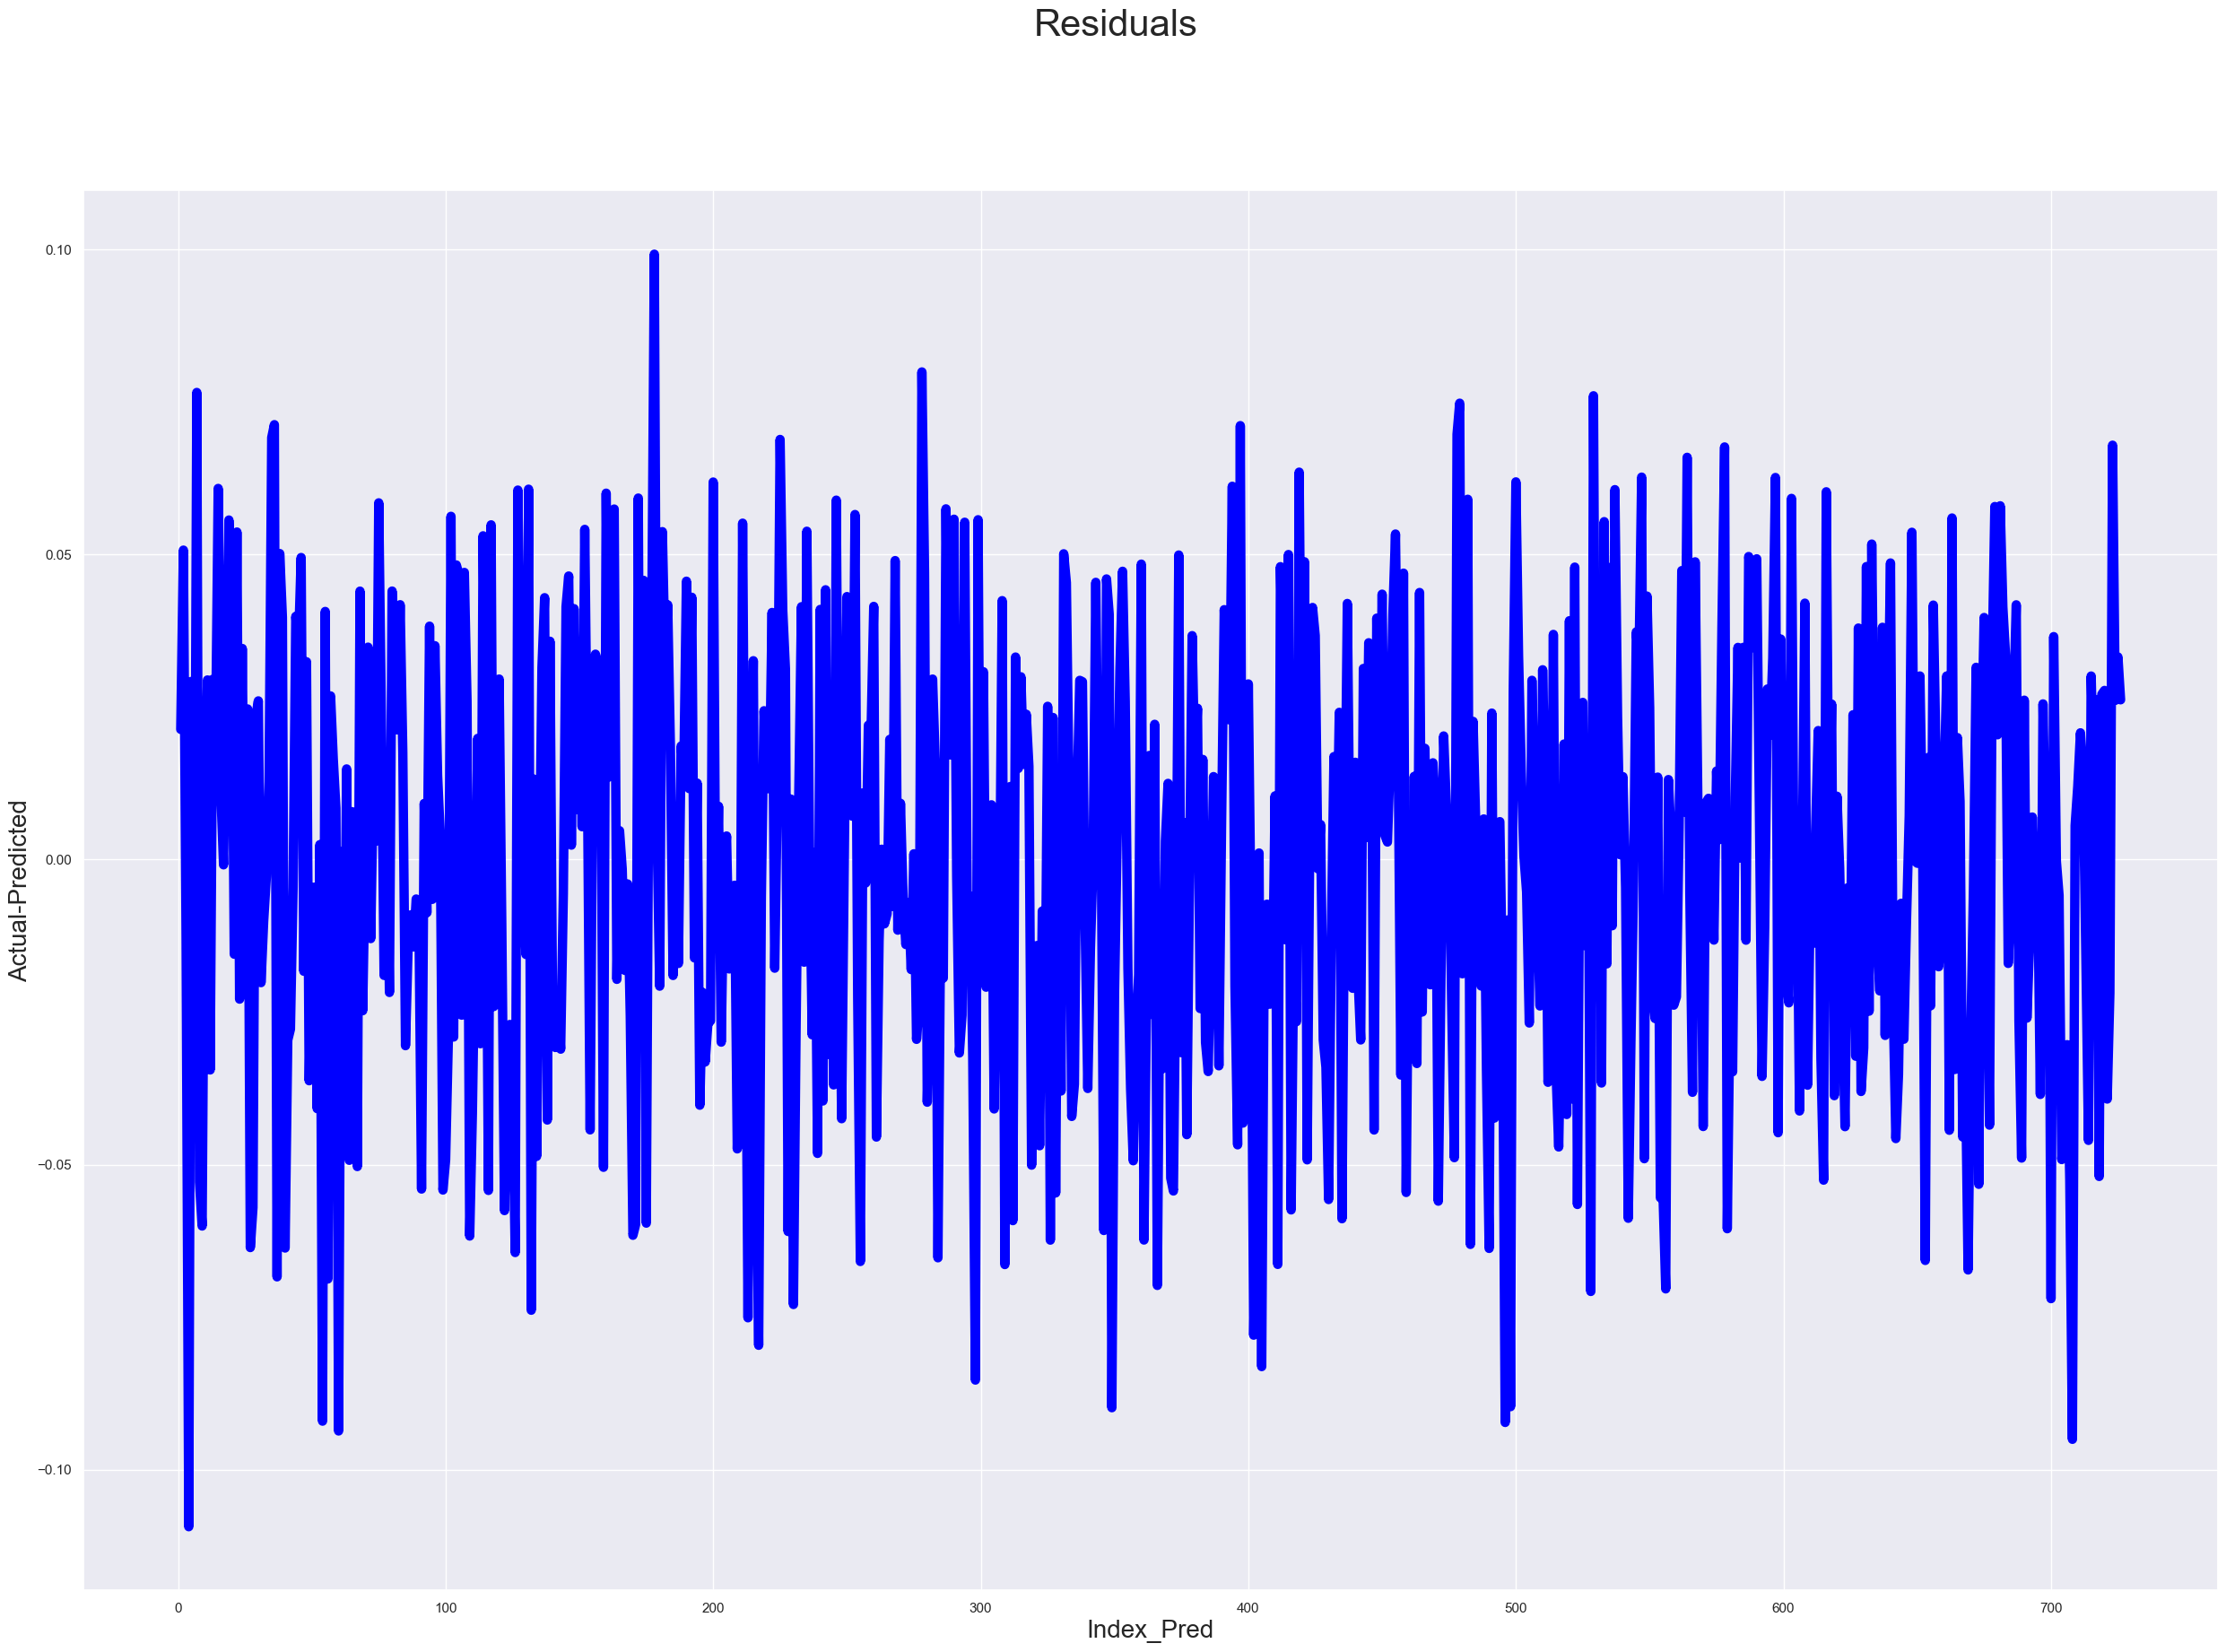

In [60]:
## Plotting the residuals 30% of 2417=725 but take 727 since dimension vary
cnt = [i for i in range(1,727,1)]
fig=plt.figure()
plt.plot(cnt,y_pred-y_test, color = 'blue', linewidth = 7.5, linestyle = '-')
fig.suptitle('Residuals',fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual-Predicted', fontsize = 20)
plt.show()

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

In [62]:
RF = RandomForestRegressor()

In [63]:
RF.fit(x_train,y_train)
y_pred_rf=RF.predict(x_test)

In [64]:
print('Mean Squared error             : {} ' .format(mean_squared_error(y_test,y_pred_rf)))
print('Mean absolute %  Squared error : {} ' .format(mean_absolute_percentage_error(y_test,y_pred_rf)))
print('Root Mean Squared error        : {} ' .format(np.sqrt(mean_squared_error(y_test,y_pred_rf))))
print('r2 score                       : {} ' .format(r2_score(y_test,y_pred_rf)))
r2_RF = r2_score(y_test,y_pred_rf)

Mean Squared error             : 0.0013594485950413223 
Mean absolute %  Squared error : 0.26436705256046744 
Root Mean Squared error        : 0.03687070103810507 
r2 score                       : 0.18175042177611545 


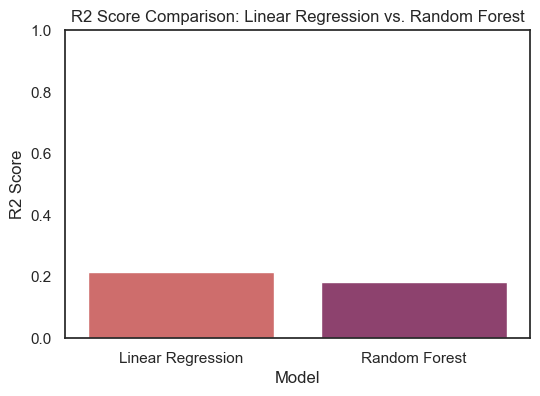

In [65]:
models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_linear, r2_RF]
r2_data = {'Model': models, 'R2 Score': r2_scores}

r2_data_df = pd.DataFrame(r2_data)

# Set the figure size and background color
plt.figure(figsize=(6, 4), facecolor='white')

# Set the style with white background (removes grid lines)
sns.set_style("white")

# Create the bar plot using Seaborn
sns.barplot(x='Model', y='R2 Score', data=r2_data_df, palette="flare")
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison: Linear Regression vs. Random Forest')
plt.ylim(0, 1)  # Set the y-axis limits to ensure the scale from 0 to 1

plt.show()

Based on the metrics, the linear regression model has a slightly better R-squared score (0.241) than the random forest regressor (0.227). However, both models have a relatively low R-squared score, which indicates that they are not very good at predicting the target variable.

The MAE and RMSE scores for both models are also relatively high. This indicates that the models make significant errors when predicting the target variable.

Overall, the results of our models suggest that they are not very good at predicting the target variable. we may want to consider using different models or tuning the hyperparameters of our current models to try to improve their performance.

In [66]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [67]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [68]:
# Train the SVM model
model = SVC(kernel="linear")
model.fit(x_train, y_train)

SVC(kernel='linear')

In [96]:
y_pred = model.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score

# Assuming you have already defined y_test and predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.09917355371900827


In [98]:
r2_svm = r2_score(y_test, y_pred)
print("R-squared:", r2_svm)

R-squared: -0.19426207708049992


Lets Try Hyper Parameter Tuning

In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 2.0, 2.5, 10.0]}  # Grid of alpha values to try

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5)  # Adjust cv parameter as needed
grid_search.fit(X, Y)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_
print("Best Alpha:", best_alpha)
print("Best Score:", best_score)

Best Alpha: 2.0
Best Score: 0.2829703878657145


In [79]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=2.0)
ridge_regression.fit(x_train, y_train)

Ridge(alpha=2.0)

In [82]:
y_pred = ridge_regression.predict(x_test)

In [85]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE)
r2_lasso = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

In [86]:
print("r2 value: ",r2_lasso)
print("mse:",mse)
print("rmse:",rmse)
print("mae: ",mae)

r2 value:  0.21639897790489637
mse: 13.018831135512807
rmse: 3.608161739101063
mae:  2.977539152363495


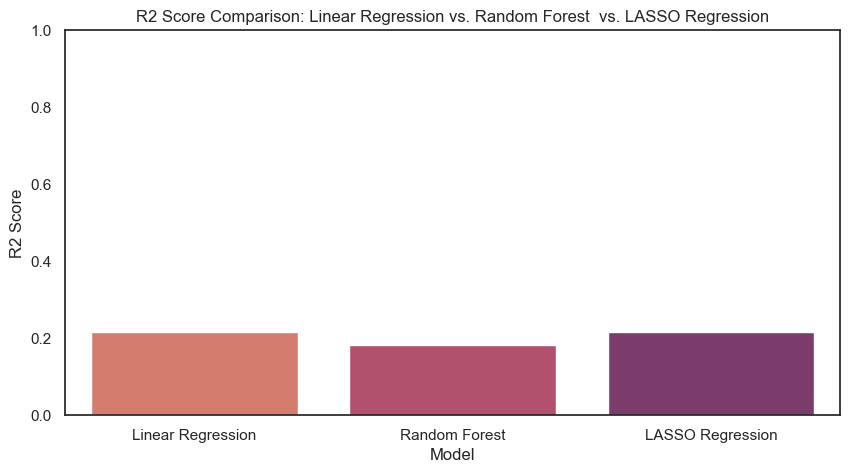

In [101]:
models = ['Linear Regression', 'Random Forest','LASSO Regression']
r2_scores = [r2_linear, r2_RF, r2_lasso]
r2_data = {'Model': models, 'R2 Score': r2_scores}

r2_data_df = pd.DataFrame(r2_data)


plt.figure(figsize=(10, 5), facecolor='white')

# Set the style with white background (removes grid lines)
sns.set_style("white")

sns.barplot(x='Model', y='R2 Score', data=r2_data_df, palette="flare")
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison: Linear Regression vs. Random Forest  vs. LASSO Regression')
plt.ylim(0, 1) 
plt.show()

Linear Regression and Lasso Regression have similar R2 values around 0.216, which means they explain approximately 21.6% of the variance in the data. Random Forest has a lower R2 value of around 0.182, indicating a slightly weaker fit. The SVM model shows a negative R-squared value, which indicates that it is performing worse than a horizontal line for predicting the target variable and may not be suitable for this dataset.
Linear Regression has the lowest MAE of approximately 0.030, making it the best model based on this metric.
Linear Regression has the lowest MSE value of approximately 0.00130, making it the best model based on this metric
Linear Regression has the lowest RMSE of approximately 0.0361, making it the best model based on this metric.
    

## Based on these metrics, it appears that Linear Regression performs the best among the models considered, with Lasso Regression being a close competitor. Random Forest shows weaker performance compared to the other two, while SVM performs poorly with a negative R-squared value and low accuracy.